# Предсказание температуры сплава для металлургического комбината

## Описание исследования

С целью оптимизации производственных расходов металлургическому комбинату необходимо уменьшить потребление электроэнергии на этапе обработки стали. Для этого комбинату нужно контролировать температуру сплава.

Заказчику необходима модель, предсказывающая температуру сплава, с помощью которой заказчик будет имитировать технологический процесс, описанный ниже.

Сталь обрабатывают в металлическом ковше вместимостью около 100 тонн. Чтобы ковш выдерживал высокие температуры, изнутри его облицовывают огнеупорным кирпичом. Расплавленную сталь заливают в ковш и подогревают до нужной температуры графитовыми электродами, установленными в крышке ковша.

Из сплава выводится сера (этот процесс называется десульфурацией), добавлением примесей корректируется химический состав и отбираются пробы. Сталь легируют, то есть изменяют её состав, подавая куски сплава из бункера для сыпучих материалов или проволоку через специальный трайб-аппарат (от англ. tribe — «масса»).

Перед тем как первый раз ввести легирующие добавки, измеряют температуру стали и производят её химический анализ. Потом температуру на несколько минут повышают, добавляют легирующие материалы и продувают сплав инертным газом. Затем его перемешивают и снова проводят измерения. Такой цикл повторяется до достижения целевого химического состава и оптимальной температуры плавки.

После этого расплавленная сталь отправляется на доводку металла или поступает в машину непрерывной разливки, откуда готовый продукт выходит в виде заготовок-слябов (от англ. slab — «плита»).

Минимальная температура получаемого сплава, установленная документацией технологического процесса, должна быть не ниже 1400 градусов.

## Цель исследования

Целью исследования является разработка модели, предсказывающей температуру сплава по входным данным об электродах, легировании и продувке сплава. Качество модели определяется метрикой MAE, значение которой на тестовой выборке должно быть не более 6.8 градусов.

## План (задачи) исследования

- Загрузка и первичное знакомство с данными;
- Предобработка данных, содержащихся в первичных датафреймах, включая форматирование данных, обработку пропущенных и аномальных значений;
- Исследовательский анализ данных, содержащихся в первичных датафреймах:
 - Исследование описательных статистик;
 - Визуализация распределения данных с помощью гистограмм и диаграмм размаха;
- Создание единого (финального) датафрейма, содержащего необходимые данные для обучения моделей;
- Предобработка данных, содержащихся в финальном датафрейме;
- Исследовательский анализ данных, содержащихся в финальном датафрейме:
 - Исследование описательных статистик;
 - Визуализация распределения данных с помощью гистограмм и диаграмм размаха;
 - Корреляционный анализ признаков с помощью матрицы корреляции `phik` и диаграмм рассеяния;
- Подготовка выборок для обучения моделей;
- Решение задачи регрессии путём обучения с учителем следующих моделей:
 - `Ridge`;
 - `Lasso`;
 - `SVR`;
 - `kNN`;
 - `DecisionTree`;
 - `LightGBM`;
- Выбор лучшей модели и проверка её качества на тестовой выборке;
- Анализ важности признаков с помощью SHAP;
- Подготовка общего вывода (отчёта) о проделанной работе.

## Исходные данные

Данные содержатся в нескольких файлах, полученных из разных источников:

- `data_arc_new.csv` — данные об электродах;
- `data_bulk_new.csv` — данные о подаче сыпучих материалов (объём);
- `data_bulk_time_new.csv` — данные о подаче сыпучих материалов (время);
- `data_gas_new.csv` — данные о продувке сплава газом;
- `data_temp_new.csv` — результаты измерения температуры;
- `data_wire_new.csv` — данные о проволочных материалах (объём);
- `data_wire_time_new.csv` — данные о проволочных материалах (время).

Описание данных:

- Файл `data_arc_new.csv`:
 -  `key` — номер партии;
 - `Начало нагрева дугой` — время начала нагрева;
 - `Конец нагрева дугой` — время окончания нагрева;
 - `Активная мощность` — значение активной мощности;
 - `Реактивная мощность` — значение реактивной мощности.


- Файл `data_bulk_new.csv`:

 - `key` — номер партии;
 - `Bulk 1 … Bulk 15` — объём подаваемого материала.


- Файл `data_bulk_time_new.csv`:

 - `key` — номер партии;
 - `Bulk 1 … Bulk 15` — время подачи материала.


- Файл `data_gas_new.csv`:

 - `key` — номер партии;
 - `Газ 1` — объём подаваемого газа.


- Файл `data_temp_new.csv`:

 - `key` — номер партии;
 - `Время замера` — время замера;
 - `Температура` — значение температуры (целевой признак).


- Файл `data_wire_new.csv`:

 - `key` — номер партии;
 - `Wire 1 … Wire 9` — объём подаваемых проволочных материалов.


- Файл `data_wire_time_new.csv`:

 - `key` — номер партии;
 - `Wire 1 … Wire 9` — время подачи проволочных материалов.


Во всех файлах столбец `key` содержит номер партии (ковша).
В файлах может быть несколько строк с одинаковым значением `key`: они соответствуют разным итерациям обработки.

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Описание-исследования" data-toc-modified-id="Описание-исследования-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Описание исследования</a></span></li><li><span><a href="#Цель-исследования" data-toc-modified-id="Цель-исследования-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Цель исследования</a></span></li><li><span><a href="#План-(задачи)-исследования" data-toc-modified-id="План-(задачи)-исследования-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>План (задачи) исследования</a></span></li><li><span><a href="#Исходные-данные" data-toc-modified-id="Исходные-данные-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исходные данные</a></span></li><li><span><a href="#Импорт-библиотек-и-знакомство-с-данными" data-toc-modified-id="Импорт-библиотек-и-знакомство-с-данными-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Импорт библиотек и знакомство с данными</a></span></li><li><span><a href="#Знакомство-с-данными" data-toc-modified-id="Знакомство-с-данными-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Знакомство с данными</a></span><ul class="toc-item"><li><span><a href="#Вывод-по-результатам-знакомства-с-данными" data-toc-modified-id="Вывод-по-результатам-знакомства-с-данными-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Вывод по результатам знакомства с данными</a></span></li></ul></li><li><span><a href="#Предобработка-данных-в-первичных-датафреймах" data-toc-modified-id="Предобработка-данных-в-первичных-датафреймах-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Предобработка данных в первичных датафреймах</a></span></li><li><span><a href="#Исследовательский-анализ-данных-в-первичных-датафреймах" data-toc-modified-id="Исследовательский-анализ-данных-в-первичных-датафреймах-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Исследовательский анализ данных в первичных датафреймах</a></span><ul class="toc-item"><li><span><a href="#Изучение-описательных-статистик-первичных-датафреймов" data-toc-modified-id="Изучение-описательных-статистик-первичных-датафреймов-8.1"><span class="toc-item-num">8.1&nbsp;&nbsp;</span>Изучение описательных статистик первичных датафреймов</a></span></li><li><span><a href="#Визуализация-распределения-данных-в-первичных-датафреймах" data-toc-modified-id="Визуализация-распределения-данных-в-первичных-датафреймах-8.2"><span class="toc-item-num">8.2&nbsp;&nbsp;</span>Визуализация распределения данных в первичных датафреймах</a></span></li><li><span><a href="#Вывод-по-результатам-исследовательского-анализа-данных-в-первичных-датафреймах" data-toc-modified-id="Вывод-по-результатам-исследовательского-анализа-данных-в-первичных-датафреймах-8.3"><span class="toc-item-num">8.3&nbsp;&nbsp;</span>Вывод по результатам исследовательского анализа данных в первичных датафреймах</a></span></li></ul></li><li><span><a href="#Объединение-данных-в-общий-датафрейм" data-toc-modified-id="Объединение-данных-в-общий-датафрейм-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Объединение данных в общий датафрейм</a></span><ul class="toc-item"><li><span><a href="#Вывод-по-результатам-объединения-данных" data-toc-modified-id="Вывод-по-результатам-объединения-данных-9.1"><span class="toc-item-num">9.1&nbsp;&nbsp;</span>Вывод по результатам объединения данных</a></span></li></ul></li><li><span><a href="#Предобработка-и-исследовательский-анализ-данных-объединённого-датафрейма" data-toc-modified-id="Предобработка-и-исследовательский-анализ-данных-объединённого-датафрейма-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Предобработка и исследовательский анализ данных объединённого датафрейма</a></span><ul class="toc-item"><li><span><a href="#Вывод-по-результатам-предобработки-и-исследовательского-анализа-данных-объединённого-датафрейма" data-toc-modified-id="Вывод-по-результатам-предобработки-и-исследовательского-анализа-данных-объединённого-датафрейма-10.1"><span class="toc-item-num">10.1&nbsp;&nbsp;</span>Вывод по результатам предобработки и исследовательского анализа данных объединённого датафрейма</a></span></li></ul></li><li><span><a href="#Корреляционный-анализ-признаков-объединённого-датафрейма" data-toc-modified-id="Корреляционный-анализ-признаков-объединённого-датафрейма-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>Корреляционный анализ признаков объединённого датафрейма</a></span><ul class="toc-item"><li><span><a href="#Вывод-по-результатам-корреляционного-анализа-признаков-объединённого-датафрейма" data-toc-modified-id="Вывод-по-результатам-корреляционного-анализа-признаков-объединённого-датафрейма-11.1"><span class="toc-item-num">11.1&nbsp;&nbsp;</span>Вывод по результатам корреляционного анализа признаков объединённого датафрейма</a></span></li></ul></li><li><span><a href="#Подготовка-финальной-выборки-для-обучения-моделей" data-toc-modified-id="Подготовка-финальной-выборки-для-обучения-моделей-12"><span class="toc-item-num">12&nbsp;&nbsp;</span>Подготовка финальной выборки для обучения моделей</a></span></li><li><span><a href="#Обучение-с-учителем.-Задача-регрессии." data-toc-modified-id="Обучение-с-учителем.-Задача-регрессии.-13"><span class="toc-item-num">13&nbsp;&nbsp;</span>Обучение с учителем. Задача регрессии.</a></span><ul class="toc-item"><li><span><a href="#Обучение-модели-линейной-регрессии-с-L1-регуляризацией" data-toc-modified-id="Обучение-модели-линейной-регрессии-с-L1-регуляризацией-13.1"><span class="toc-item-num">13.1&nbsp;&nbsp;</span>Обучение модели линейной регрессии с L1-регуляризацией</a></span></li><li><span><a href="#Обучение-модели-линейной-регрессии-с-L2-регуляризацией" data-toc-modified-id="Обучение-модели-линейной-регрессии-с-L2-регуляризацией-13.2"><span class="toc-item-num">13.2&nbsp;&nbsp;</span>Обучение модели линейной регрессии с L2-регуляризацией</a></span></li><li><span><a href="#Обучение-модели-метода-опорных-векторов" data-toc-modified-id="Обучение-модели-метода-опорных-векторов-13.3"><span class="toc-item-num">13.3&nbsp;&nbsp;</span>Обучение модели метода опорных векторов</a></span></li><li><span><a href="#Обучение-модели-kNN" data-toc-modified-id="Обучение-модели-kNN-13.4"><span class="toc-item-num">13.4&nbsp;&nbsp;</span>Обучение модели kNN</a></span></li><li><span><a href="#Обучение-модели-дерева-решений" data-toc-modified-id="Обучение-модели-дерева-решений-13.5"><span class="toc-item-num">13.5&nbsp;&nbsp;</span>Обучение модели дерева решений</a></span></li><li><span><a href="#Обучение-модели-LightGBM" data-toc-modified-id="Обучение-модели-LightGBM-13.6"><span class="toc-item-num">13.6&nbsp;&nbsp;</span>Обучение модели LightGBM</a></span></li><li><span><a href="#Вывод-по-результатам-обучения-моделей" data-toc-modified-id="Вывод-по-результатам-обучения-моделей-13.7"><span class="toc-item-num">13.7&nbsp;&nbsp;</span>Вывод по результатам обучения моделей</a></span></li></ul></li><li><span><a href="#Выбор-лучшей-модели-и-анализ-её-качества" data-toc-modified-id="Выбор-лучшей-модели-и-анализ-её-качества-14"><span class="toc-item-num">14&nbsp;&nbsp;</span>Выбор лучшей модели и анализ её качества</a></span><ul class="toc-item"><li><span><a href="#Вывод-по-результатам-выбора-лучшей-модели" data-toc-modified-id="Вывод-по-результатам-выбора-лучшей-модели-14.1"><span class="toc-item-num">14.1&nbsp;&nbsp;</span>Вывод по результатам выбора лучшей модели</a></span></li></ul></li><li><span><a href="#Общий-вывод-(отчёт)" data-toc-modified-id="Общий-вывод-(отчёт)-15"><span class="toc-item-num">15&nbsp;&nbsp;</span>Общий вывод (отчёт)</a></span></li></ul></div>

## Импорт библиотек и знакомство с данными

In [1]:
# устанавливаем библиотеку phik
!pip install phik -q

In [2]:
# устанавливаем библиотеку shap
!pip install shap -q

In [3]:
# устанавливаем библиотеку optuna
!pip install optuna-integration -q

In [4]:
# делаем необходимые импорты
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import phik
import shap

from optuna.distributions import (IntDistribution,
                                  FloatDistribution,
                                  CategoricalDistribution)
from optuna.integration import OptunaSearchCV

from lightgbm import LGBMRegressor

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

from sklearn.pipeline import Pipeline

In [5]:
# объявляем константы
RANDOM_STATE = 120824
TEST_SIZE = 0.25

# настройки отображения данных
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 150)
sns.set_theme(style='darkgrid')

In [6]:
# загружаем датасеты
try:
    df_arc_new = pd.read_csv('data_arc_new.csv',
                             parse_dates=[1, 2])
    df_bulk_new = pd.read_csv('data_bulk_new.csv')
    df_bulk_time_new = pd.read_csv('data_bulk_time_new.csv',
                                   parse_dates=list(range(1, 16)))
    df_gas_new = pd.read_csv('data_gas_new.csv')
    df_temp_new = pd.read_csv('data_temp_new.csv',
                              parse_dates=[1])
    df_wire_new = pd.read_csv('data_wire_new.csv')
    df_wire_time_new = pd.read_csv('data_wire_time_new.csv',
                                   parse_dates=list(range(1, 10)))
except:
    df_arc_new = pd.read_csv(
        'https://code.s3.yandex.net/datasets/data_arc_new.csv',
        parse_dates=[1, 2]
    )
    df_bulk_new = pd.read_csv(
        'https://code.s3.yandex.net/datasets/data_bulk_new.csv'
    )
    df_bulk_time_new = pd.read_csv(
        'https://code.s3.yandex.net/datasets/data_bulk_time_new.csv',
        parse_dates=list(range(1, 16))
    )
    df_gas_new = pd.read_csv(
        'https://code.s3.yandex.net/datasets/data_gas_new.csv'
    )
    df_temp_new = pd.read_csv(
        'https://code.s3.yandex.net/datasets/data_temp_new.csv',
        parse_dates=[1]
    )
    df_wire_new = pd.read_csv(
        'https://code.s3.yandex.net/datasets/data_wire_new.csv'
    )
    df_wire_time_new = pd.read_csv(
        'https://code.s3.yandex.net/datasets/data_wire_time_new.csv',
        parse_dates=list(range(1, 10))
    )

## Знакомство с данными

In [7]:
# создаем функцию для общей проверки данных в датафреймах
def get_initial_info(dataframe, dataframe_name, n_rows=5):
    print(f'Первые {n_rows} строк датафрейма {dataframe_name}:\n')
    display(dataframe.head(n_rows))
    print(f"\n{'-' * 80}")
    print(f'Общая информация о датафрейме {dataframe_name}:\n')
    dataframe.info()
    print(f"\n{'-' * 80}")
    print(f'Количество уникальных значений в колонках датафрейма \
{dataframe_name} (шт.):\n')
    display(dataframe.nunique())
    print(f"\n{'-' * 80}")
    print(f'Количество пропусков в колонках датафрейма \
{dataframe_name} (шт.):\n')
    display(dataframe.isna().sum())
    print(f"\n{'-' * 80}")
    print(f'Количество пропусков в колонках датафрейма \
{dataframe_name} (проценты):\n')
    display(dataframe.isna().sum()/len(dataframe) * 100)
    print(f"\n{'-' * 80}")
    print(f'Количество полных (явных) дубликатов в датафрейме \
{dataframe_name}:\n')
    display(dataframe.duplicated().sum())
    print(f"\n{'-' * 80}")
    print(f'Колонки датафрейма {dataframe_name}:\n')
    display(dataframe.columns)

In [8]:
# знакомимся с датафреймом df_arc_new
get_initial_info(df_arc_new, 'df_arc_new', n_rows=20)

Первые 20 строк датафрейма df_arc_new:



,key,Начало нагрева дугой,Конец нагрева дугой,Активная мощность,Реактивная мощность
0,1,2019-05-03 11:02:14,2019-05-03 11:06:02,0.305130,0.211253
1,1,2019-05-03 11:07:28,2019-05-03 11:10:33,0.765658,0.477438
2,1,2019-05-03 11:11:44,2019-05-03 11:14:36,0.580313,0.430460
3,1,2019-05-03 11:18:14,2019-05-03 11:24:19,0.518496,0.379979
4,1,2019-05-03 11:26:09,2019-05-03 11:28:37,0.867133,0.643691
5,2,2019-05-03 11:34:14,2019-05-03 11:36:31,0.381124,0.220351
6,2,2019-05-03 11:38:50,2019-05-03 11:44:28,0.261665,0.205527
7,2,2019-05-03 11:46:19,2019-05-03 11:48:25,0.710297,0.484962
8,2,2019-05-03 11:49:48,2019-05-03 11:53:18,0.786322,0.542517
9,3,2019-05-03 12:06:54,2019-05-03 12:11:34,1.101678,0.820856



--------------------------------------------------------------------------------
Общая информация о датафрейме df_arc_new:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14876 entries, 0 to 14875
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   key                   14876 non-null  int64         
 1   Начало нагрева дугой  14876 non-null  datetime64[ns]
 2   Конец нагрева дугой   14876 non-null  datetime64[ns]
 3   Активная мощность     14876 non-null  float64       
 4   Реактивная мощность   14876 non-null  float64       
dtypes: datetime64[ns](2), float64(2), int64(1)
memory usage: 581.2 KB

--------------------------------------------------------------------------------
Количество уникальных значений в колонках датафрейма df_arc_new (шт.):



key                      3214
Начало нагрева дугой    14876
Конец нагрева дугой     14876
Активная мощность       13846
Реактивная мощность     14707
dtype: int64


--------------------------------------------------------------------------------
Количество пропусков в колонках датафрейма df_arc_new (шт.):



key                     0
Начало нагрева дугой    0
Конец нагрева дугой     0
Активная мощность       0
Реактивная мощность     0
dtype: int64


--------------------------------------------------------------------------------
Количество пропусков в колонках датафрейма df_arc_new (проценты):



key                     0.0
Начало нагрева дугой    0.0
Конец нагрева дугой     0.0
Активная мощность       0.0
Реактивная мощность     0.0
dtype: float64


--------------------------------------------------------------------------------
Количество полных (явных) дубликатов в датафрейме df_arc_new:



0


--------------------------------------------------------------------------------
Колонки датафрейма df_arc_new:



Index(['key', 'Начало нагрева дугой', 'Конец нагрева дугой',
       'Активная мощность', 'Реактивная мощность'],
      dtype='object')

In [9]:
# знакомимся с датафреймом df_bulk_new
get_initial_info(df_bulk_new, 'df_bulk_new', n_rows=10)

Первые 10 строк датафрейма df_bulk_new:



,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
0,1,NaN,NaN,NaN,43.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.0,NaN,150.0,154.0
1,2,NaN,NaN,NaN,73.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.0,NaN,149.0,154.0
2,3,NaN,NaN,NaN,34.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,205.0,NaN,152.0,153.0
3,4,NaN,NaN,NaN,81.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,207.0,NaN,153.0,154.0
4,5,NaN,NaN,NaN,78.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,203.0,NaN,151.0,152.0
5,6,NaN,NaN,NaN,117.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,204.0,NaN,201.0,154.0
6,7,NaN,NaN,NaN,117.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,204.0,NaN,152.0,154.0
7,8,NaN,NaN,NaN,99.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,410.0,NaN,252.0,153.0
8,9,NaN,NaN,NaN,117.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,107.0,NaN,99.0,203.0
9,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,203.0,NaN,102.0,204.0



--------------------------------------------------------------------------------
Общая информация о датафрейме df_bulk_new:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   key      3129 non-null   int64  
 1   Bulk 1   252 non-null    float64
 2   Bulk 2   22 non-null     float64
 3   Bulk 3   1298 non-null   float64
 4   Bulk 4   1014 non-null   float64
 5   Bulk 5   77 non-null     float64
 6   Bulk 6   576 non-null    float64
 7   Bulk 7   25 non-null     float64
 8   Bulk 8   1 non-null      float64
 9   Bulk 9   19 non-null     float64
 10  Bulk 10  176 non-null    float64
 11  Bulk 11  177 non-null    float64
 12  Bulk 12  2450 non-null   float64
 13  Bulk 13  18 non-null     float64
 14  Bulk 14  2806 non-null   float64
 15  Bulk 15  2248 non-null   float64
dtypes: float64(15), int64(1)
memory usage: 391.2 KB

-----------------------------

key        3129
Bulk 1       47
Bulk 2       15
Bulk 3      278
Bulk 4      206
Bulk 5       55
Bulk 6      205
Bulk 7       25
Bulk 8        1
Bulk 9       10
Bulk 10      77
Bulk 11     101
Bulk 12     331
Bulk 13      14
Bulk 14     284
Bulk 15     156
dtype: int64


--------------------------------------------------------------------------------
Количество пропусков в колонках датафрейма df_bulk_new (шт.):



key           0
Bulk 1     2877
Bulk 2     3107
Bulk 3     1831
Bulk 4     2115
Bulk 5     3052
Bulk 6     2553
Bulk 7     3104
Bulk 8     3128
Bulk 9     3110
Bulk 10    2953
Bulk 11    2952
Bulk 12     679
Bulk 13    3111
Bulk 14     323
Bulk 15     881
dtype: int64


--------------------------------------------------------------------------------
Количество пропусков в колонках датафрейма df_bulk_new (проценты):



key         0.000000
Bulk 1     91.946309
Bulk 2     99.296900
Bulk 3     58.517098
Bulk 4     67.593480
Bulk 5     97.539150
Bulk 6     81.591563
Bulk 7     99.201023
Bulk 8     99.968041
Bulk 9     99.392777
Bulk 10    94.375200
Bulk 11    94.343241
Bulk 12    21.700224
Bulk 13    99.424736
Bulk 14    10.322787
Bulk 15    28.155960
dtype: float64


--------------------------------------------------------------------------------
Количество полных (явных) дубликатов в датафрейме df_bulk_new:



0


--------------------------------------------------------------------------------
Колонки датафрейма df_bulk_new:



Index(['key', 'Bulk 1', 'Bulk 2', 'Bulk 3', 'Bulk 4', 'Bulk 5', 'Bulk 6',
       'Bulk 7', 'Bulk 8', 'Bulk 9', 'Bulk 10', 'Bulk 11', 'Bulk 12',
       'Bulk 13', 'Bulk 14', 'Bulk 15'],
      dtype='object')

In [10]:
# знакомимся с датафреймом df_bulk_time_new
get_initial_info(df_bulk_time_new, 'df_bulk_time_new', n_rows=10)

Первые 10 строк датафрейма df_bulk_time_new:



,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
0,1,NaT,NaT,NaT,2019-05-03 11:28:48,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2019-05-03 11:24:31,NaT,2019-05-03 11:14:50,2019-05-03 11:10:43
1,2,NaT,NaT,NaT,2019-05-03 11:36:50,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2019-05-03 11:53:30,NaT,2019-05-03 11:48:37,2019-05-03 11:44:39
2,3,NaT,NaT,NaT,2019-05-03 12:32:39,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2019-05-03 12:27:13,NaT,2019-05-03 12:21:01,2019-05-03 12:16:16
3,4,NaT,NaT,NaT,2019-05-03 12:43:22,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2019-05-03 12:58:00,NaT,2019-05-03 12:51:11,2019-05-03 12:46:36
4,5,NaT,NaT,NaT,2019-05-03 13:30:47,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2019-05-03 13:30:47,NaT,2019-05-03 13:34:12,2019-05-03 13:30:47
5,6,NaT,NaT,NaT,2019-05-03 13:57:27,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2019-05-03 13:48:52,NaT,2019-05-03 14:09:42,2019-05-03 14:03:15
6,7,NaT,NaT,NaT,2019-05-03 14:18:58,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2019-05-03 14:41:26,NaT,2019-05-03 14:30:50,2019-05-03 14:27:16
7,8,NaT,NaT,NaT,2019-05-03 15:17:58,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2019-05-03 15:17:58,NaT,2019-05-03 15:13:18,2019-05-03 15:05:33
8,9,NaT,NaT,NaT,2019-05-03 16:03:08,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2019-05-03 16:03:08,NaT,2019-05-03 16:00:16,2019-05-03 15:52:39
9,10,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2019-05-03 16:38:11,NaT,2019-05-03 16:34:24,2019-05-03 16:29:56



--------------------------------------------------------------------------------
Общая информация о датафрейме df_bulk_time_new:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   key      3129 non-null   int64         
 1   Bulk 1   252 non-null    datetime64[ns]
 2   Bulk 2   22 non-null     datetime64[ns]
 3   Bulk 3   1298 non-null   datetime64[ns]
 4   Bulk 4   1014 non-null   datetime64[ns]
 5   Bulk 5   77 non-null     datetime64[ns]
 6   Bulk 6   576 non-null    datetime64[ns]
 7   Bulk 7   25 non-null     datetime64[ns]
 8   Bulk 8   1 non-null      datetime64[ns]
 9   Bulk 9   19 non-null     datetime64[ns]
 10  Bulk 10  176 non-null    datetime64[ns]
 11  Bulk 11  177 non-null    datetime64[ns]
 12  Bulk 12  2450 non-null   datetime64[ns]
 13  Bulk 13  18 non-null     datetime64[ns]
 14  Bulk 14  2806 non-null   datetime64[n

key        3129
Bulk 1      252
Bulk 2       22
Bulk 3     1298
Bulk 4     1014
Bulk 5       77
Bulk 6      576
Bulk 7       25
Bulk 8        1
Bulk 9       19
Bulk 10     176
Bulk 11     177
Bulk 12    2450
Bulk 13      18
Bulk 14    2806
Bulk 15    2248
dtype: int64


--------------------------------------------------------------------------------
Количество пропусков в колонках датафрейма df_bulk_time_new (шт.):



key           0
Bulk 1     2877
Bulk 2     3107
Bulk 3     1831
Bulk 4     2115
Bulk 5     3052
Bulk 6     2553
Bulk 7     3104
Bulk 8     3128
Bulk 9     3110
Bulk 10    2953
Bulk 11    2952
Bulk 12     679
Bulk 13    3111
Bulk 14     323
Bulk 15     881
dtype: int64


--------------------------------------------------------------------------------
Количество пропусков в колонках датафрейма df_bulk_time_new (проценты):



key         0.000000
Bulk 1     91.946309
Bulk 2     99.296900
Bulk 3     58.517098
Bulk 4     67.593480
Bulk 5     97.539150
Bulk 6     81.591563
Bulk 7     99.201023
Bulk 8     99.968041
Bulk 9     99.392777
Bulk 10    94.375200
Bulk 11    94.343241
Bulk 12    21.700224
Bulk 13    99.424736
Bulk 14    10.322787
Bulk 15    28.155960
dtype: float64


--------------------------------------------------------------------------------
Количество полных (явных) дубликатов в датафрейме df_bulk_time_new:



0


--------------------------------------------------------------------------------
Колонки датафрейма df_bulk_time_new:



Index(['key', 'Bulk 1', 'Bulk 2', 'Bulk 3', 'Bulk 4', 'Bulk 5', 'Bulk 6',
       'Bulk 7', 'Bulk 8', 'Bulk 9', 'Bulk 10', 'Bulk 11', 'Bulk 12',
       'Bulk 13', 'Bulk 14', 'Bulk 15'],
      dtype='object')

In [11]:
# знакомимся с датафреймом df_gas_new
get_initial_info(df_gas_new, 'df_gas_new', n_rows=10)

Первые 10 строк датафрейма df_gas_new:



,key,Газ 1
0,1,29.749986
1,2,12.555561
2,3,28.554793
3,4,18.841219
4,5,5.413692
5,6,11.273392
6,7,9.836267
7,8,15.171553
8,9,8.216623
9,10,6.529891



--------------------------------------------------------------------------------
Общая информация о датафрейме df_gas_new:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3239 entries, 0 to 3238
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   key     3239 non-null   int64  
 1   Газ 1   3239 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 50.7 KB

--------------------------------------------------------------------------------
Количество уникальных значений в колонках датафрейма df_gas_new (шт.):



key      3239
Газ 1    3239
dtype: int64


--------------------------------------------------------------------------------
Количество пропусков в колонках датафрейма df_gas_new (шт.):



key      0
Газ 1    0
dtype: int64


--------------------------------------------------------------------------------
Количество пропусков в колонках датафрейма df_gas_new (проценты):



key      0.0
Газ 1    0.0
dtype: float64


--------------------------------------------------------------------------------
Количество полных (явных) дубликатов в датафрейме df_gas_new:



0


--------------------------------------------------------------------------------
Колонки датафрейма df_gas_new:



Index(['key', 'Газ 1'], dtype='object')

In [12]:
# знакомимся с датафреймом df_temp_new
get_initial_info(df_temp_new, 'df_temp_new', n_rows=20)

Первые 20 строк датафрейма df_temp_new:



,key,Время замера,Температура
0,1,2019-05-03 11:02:04,1571.0
1,1,2019-05-03 11:07:18,1604.0
2,1,2019-05-03 11:11:34,1618.0
3,1,2019-05-03 11:18:04,1601.0
4,1,2019-05-03 11:25:59,1606.0
5,1,2019-05-03 11:30:38,1613.0
6,2,2019-05-03 11:34:04,1581.0
7,2,2019-05-03 11:38:40,1577.0
8,2,2019-05-03 11:46:09,1589.0
9,2,2019-05-03 11:49:38,1604.0



--------------------------------------------------------------------------------
Общая информация о датафрейме df_temp_new:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18092 entries, 0 to 18091
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   key           18092 non-null  int64         
 1   Время замера  18092 non-null  datetime64[ns]
 2   Температура   14665 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 424.2 KB

--------------------------------------------------------------------------------
Количество уникальных значений в колонках датафрейма df_temp_new (шт.):



key              3216
Время замера    18092
Температура       172
dtype: int64


--------------------------------------------------------------------------------
Количество пропусков в колонках датафрейма df_temp_new (шт.):



key                0
Время замера       0
Температура     3427
dtype: int64


--------------------------------------------------------------------------------
Количество пропусков в колонках датафрейма df_temp_new (проценты):



key              0.000000
Время замера     0.000000
Температура     18.942074
dtype: float64


--------------------------------------------------------------------------------
Количество полных (явных) дубликатов в датафрейме df_temp_new:



0


--------------------------------------------------------------------------------
Колонки датафрейма df_temp_new:



Index(['key', 'Время замера', 'Температура'], dtype='object')

In [13]:
# выводим уникальные значения температуры
np.sort(df_temp_new['Температура'].unique())

array([1191., 1204., 1208., 1218., 1227., 1515., 1519., 1520., 1521.,
       1522., 1525., 1526., 1527., 1528., 1529., 1530., 1531., 1532.,
       1533., 1534., 1535., 1536., 1537., 1538., 1539., 1540., 1541.,
       1542., 1543., 1544., 1545., 1546., 1547., 1548., 1549., 1550.,
       1551., 1552., 1553., 1554., 1555., 1556., 1557., 1558., 1559.,
       1560., 1561., 1562., 1563., 1564., 1565., 1566., 1567., 1568.,
       1569., 1570., 1571., 1572., 1573., 1574., 1575., 1576., 1577.,
       1578., 1579., 1580., 1581., 1582., 1583., 1584., 1585., 1586.,
       1587., 1588., 1589., 1590., 1591., 1592., 1593., 1594., 1595.,
       1596., 1597., 1598., 1599., 1600., 1601., 1602., 1603., 1604.,
       1605., 1606., 1607., 1608., 1609., 1610., 1611., 1612., 1613.,
       1614., 1615., 1616., 1617., 1618., 1619., 1620., 1621., 1622.,
       1623., 1624., 1625., 1626., 1627., 1628., 1629., 1630., 1631.,
       1632., 1633., 1634., 1635., 1636., 1637., 1638., 1639., 1640.,
       1641., 1642.,

In [14]:
# знакомимся с датафреймом df_wire_new
get_initial_info(df_wire_new, 'df_wire_new', n_rows=10)

Первые 10 строк датафрейма df_wire_new:



,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
0,1,60.059998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,96.052315,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,91.160157,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,89.063515,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,89.238236,9.114560,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,6,99.109917,9.114560,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,7,98.061600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,8,155.282394,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,9,113.393279,9.143681,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,10,81.244796,12.376000,NaN,NaN,NaN,NaN,NaN,NaN,NaN



--------------------------------------------------------------------------------
Общая информация о датафрейме df_wire_new:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3081 entries, 0 to 3080
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   key     3081 non-null   int64  
 1   Wire 1  3055 non-null   float64
 2   Wire 2  1079 non-null   float64
 3   Wire 3  63 non-null     float64
 4   Wire 4  14 non-null     float64
 5   Wire 5  1 non-null      float64
 6   Wire 6  73 non-null     float64
 7   Wire 7  11 non-null     float64
 8   Wire 8  19 non-null     float64
 9   Wire 9  29 non-null     float64
dtypes: float64(9), int64(1)
memory usage: 240.8 KB

--------------------------------------------------------------------------------
Количество уникальных значений в колонках датафрейма df_wire_new (шт.):



key       3081
Wire 1    2251
Wire 2     713
Wire 3      56
Wire 4      14
Wire 5       1
Wire 6      69
Wire 7      10
Wire 8      13
Wire 9      25
dtype: int64


--------------------------------------------------------------------------------
Количество пропусков в колонках датафрейма df_wire_new (шт.):



key          0
Wire 1      26
Wire 2    2002
Wire 3    3018
Wire 4    3067
Wire 5    3080
Wire 6    3008
Wire 7    3070
Wire 8    3062
Wire 9    3052
dtype: int64


--------------------------------------------------------------------------------
Количество пропусков в колонках датафрейма df_wire_new (проценты):



key        0.000000
Wire 1     0.843882
Wire 2    64.978903
Wire 3    97.955209
Wire 4    99.545602
Wire 5    99.967543
Wire 6    97.630639
Wire 7    99.642973
Wire 8    99.383317
Wire 9    99.058747
dtype: float64


--------------------------------------------------------------------------------
Количество полных (явных) дубликатов в датафрейме df_wire_new:



0


--------------------------------------------------------------------------------
Колонки датафрейма df_wire_new:



Index(['key', 'Wire 1', 'Wire 2', 'Wire 3', 'Wire 4', 'Wire 5', 'Wire 6',
       'Wire 7', 'Wire 8', 'Wire 9'],
      dtype='object')

In [15]:
# знакомимся с датафреймом df_wire_time_new
get_initial_info(df_wire_time_new, 'df_wire_time_new', n_rows=10)

Первые 10 строк датафрейма df_wire_time_new:



,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
0,1,2019-05-03 11:06:19,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
1,2,2019-05-03 11:36:50,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
2,3,2019-05-03 12:11:46,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
3,4,2019-05-03 12:43:22,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
4,5,2019-05-03 13:20:44,2019-05-03 13:15:34,NaT,NaT,NaT,NaT,NaT,NaT,NaT
5,6,2019-05-03 13:57:27,2019-05-03 13:48:52,NaT,NaT,NaT,NaT,NaT,NaT,NaT
6,7,2019-05-03 14:18:58,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
7,8,2019-05-03 15:01:30,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
8,9,2019-05-03 15:45:44,2019-05-03 15:39:37,NaT,NaT,NaT,NaT,NaT,NaT,NaT
9,10,2019-05-03 16:27:00,2019-05-03 16:22:36,NaT,NaT,NaT,NaT,NaT,NaT,NaT



--------------------------------------------------------------------------------
Общая информация о датафрейме df_wire_time_new:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3081 entries, 0 to 3080
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   key     3081 non-null   int64         
 1   Wire 1  3055 non-null   datetime64[ns]
 2   Wire 2  1079 non-null   datetime64[ns]
 3   Wire 3  63 non-null     datetime64[ns]
 4   Wire 4  14 non-null     datetime64[ns]
 5   Wire 5  1 non-null      datetime64[ns]
 6   Wire 6  73 non-null     datetime64[ns]
 7   Wire 7  11 non-null     datetime64[ns]
 8   Wire 8  19 non-null     datetime64[ns]
 9   Wire 9  29 non-null     datetime64[ns]
dtypes: datetime64[ns](9), int64(1)
memory usage: 240.8 KB

--------------------------------------------------------------------------------
Количество уникальных значений в колонках датафрейма df_wire_time_new (шт.):



key       3081
Wire 1    3055
Wire 2    1079
Wire 3      63
Wire 4      14
Wire 5       1
Wire 6      73
Wire 7      11
Wire 8      19
Wire 9      29
dtype: int64


--------------------------------------------------------------------------------
Количество пропусков в колонках датафрейма df_wire_time_new (шт.):



key          0
Wire 1      26
Wire 2    2002
Wire 3    3018
Wire 4    3067
Wire 5    3080
Wire 6    3008
Wire 7    3070
Wire 8    3062
Wire 9    3052
dtype: int64


--------------------------------------------------------------------------------
Количество пропусков в колонках датафрейма df_wire_time_new (проценты):



key        0.000000
Wire 1     0.843882
Wire 2    64.978903
Wire 3    97.955209
Wire 4    99.545602
Wire 5    99.967543
Wire 6    97.630639
Wire 7    99.642973
Wire 8    99.383317
Wire 9    99.058747
dtype: float64


--------------------------------------------------------------------------------
Количество полных (явных) дубликатов в датафрейме df_wire_time_new:



0


--------------------------------------------------------------------------------
Колонки датафрейма df_wire_time_new:



Index(['key', 'Wire 1', 'Wire 2', 'Wire 3', 'Wire 4', 'Wire 5', 'Wire 6',
       'Wire 7', 'Wire 8', 'Wire 9'],
      dtype='object')

### Вывод по результатам знакомства с данными

По результатам первичного знакомства мы можем сделать следующие выводы об имеющихся данных:

- Дополнительное форматирование данных во всех датафреймах не требуется, так как данные изначально загрузились в корректном формате для дальнейшего анализа, включая даты;
- Названия колонок во всех датафреймах следует привести к формату `snake_case`;
- Полных дубликатов в датафреймах не обнаружено;
- В датафрейме `df_arc_new` содержится около 15 тыс. записей о 3.2 тыс. партий стали (то есть в среднем по 4-5 записей на каждую партию), пропущенных значений в датафрейме нет;
- В датафрейме `df_bulk_new` содержится 3129 записей об объёме сыпучих материалов, при этом в колонках `Bulk 1` - `Bulk 15` количество пропущенных значений колеблется в диапазоне от 10% до 99%, на следующем этапе эти пропуски уместно заменить на заглушки в виде нулей, так как пропуски означают, что легирование сплава не производилось;
- В датафрейме `df_bulk_time_new` ситуация с пропусками в данных аналогична датафрейму `df_bulk_new`, причём в обоих датафреймах все записи уникальны по ключам, то есть в них нет двух или более записей, относящихся к одному и тому же ключу;
- В датафрейме `df_gas_new` мы видим 3239 уникальных записей как по ключу, так и по объёму газа;
- В датафрейме `df_temp_new` можно видеть 18 тыс. записей для 3.2 тыс. уникальных ключей, также мы видим дискретность значений температуры и разброс её значений в диапазоне от 1191 до 1705 градусов, при этом количество пропущенных значений температуры составляет 18.9%, на следующем этапе эти пропуски мы заменим заглушками в виде нулей для удобства дальнейшей работы с данными, а также обработам аномальные значения температуры ниже 1400 градусов.
- В датафреймах `df_wire_new` и `df_wire_time_new` мы видим по 3081 уникальной записи, количество пропущенных значений в колонке `Wire 1` не превышает 1%, в остальных колонках количество пропущенных значений находится в диапазоне от 65% до 99%, пропуски в датафрейме `df_wire_new` также уместно заменить заглушками в виде нулей, так как пропуски означают, что легирование сплава не производилось.

## Предобработка данных в первичных датафреймах

Приведём названия колонок во всех датафреймах к формату `snake_case` и заполним заглушками пропущенные значения в датафреймах.

In [16]:
# форматируем названия колонок в датафрейме df_arc_new
df_arc_new.columns = [
    'key',
    'start_heating',
    'end_heating',
    'active_power',
    'reactive_power'
]
df_arc_new.columns

Index(['key', 'start_heating', 'end_heating', 'active_power',
       'reactive_power'],
      dtype='object')

In [17]:
# форматируем названия колонок в датафрейме df_gas_new
df_gas_new.columns = ['key', 'gas_1']
df_gas_new.columns

Index(['key', 'gas_1'], dtype='object')

In [18]:
# форматируем названия колонок в датафрейме df_temp_new
df_temp_new.columns = ['key', 'measurement_time', 'temperature']
df_temp_new.columns

Index(['key', 'measurement_time', 'temperature'], dtype='object')

In [19]:
# форматируем названия колонок в остальных датафреймах
df_bulk_new.rename(
    columns=lambda x: x.replace(' ', '_').lower(),
    inplace=True
)
df_bulk_time_new.rename(
    columns=lambda x: x.replace(' ', '_').lower(),
    inplace=True
)
df_wire_new.rename(
    columns=lambda x: x.replace(' ', '_').lower(),
    inplace=True
)
df_wire_time_new.rename(
    columns=lambda x: x.replace(' ', '_').lower(),
    inplace=True
)

In [20]:
# проверяем, как выполнилось форматирование в остальных датафреймах
(
    df_bulk_new.columns,
    df_bulk_time_new.columns,
    df_wire_new.columns,
    df_wire_time_new.columns
)

(Index(['key', 'bulk_1', 'bulk_2', 'bulk_3', 'bulk_4', 'bulk_5', 'bulk_6',
        'bulk_7', 'bulk_8', 'bulk_9', 'bulk_10', 'bulk_11', 'bulk_12',
        'bulk_13', 'bulk_14', 'bulk_15'],
       dtype='object'),
 Index(['key', 'bulk_1', 'bulk_2', 'bulk_3', 'bulk_4', 'bulk_5', 'bulk_6',
        'bulk_7', 'bulk_8', 'bulk_9', 'bulk_10', 'bulk_11', 'bulk_12',
        'bulk_13', 'bulk_14', 'bulk_15'],
       dtype='object'),
 Index(['key', 'wire_1', 'wire_2', 'wire_3', 'wire_4', 'wire_5', 'wire_6',
        'wire_7', 'wire_8', 'wire_9'],
       dtype='object'),
 Index(['key', 'wire_1', 'wire_2', 'wire_3', 'wire_4', 'wire_5', 'wire_6',
        'wire_7', 'wire_8', 'wire_9'],
       dtype='object'))

In [21]:
# заменяем пропущенные значения заглушками
df_temp_new.fillna(0, inplace=True)
df_bulk_new.fillna(0, inplace=True)
df_wire_new.fillna(0, inplace=True)

**Вывод**

Наименования колонок во всех датафреймах приведеный к формату `snake_case`, пропуски в числовых данных в датафреймах `df_temp_new`, `df_bulk_new`, `df_wire_new` заменены нулевыми значениями. Обработка аномальных значений будет выполнена на следующем шаге.

## Исследовательский анализ данных в первичных датафреймах

### Изучение описательных статистик первичных датафреймов

In [22]:
# создаём функцию для вывода описательных статистик
def get_stat_data(dataframe):
    df_stat = dataframe.describe(datetime_is_numeric=True).T
    df_stat['var%'] = df_stat['std'] / df_stat['mean'] * 100
    return df_stat

In [23]:
# выводим статистическую информацию по df_arc_new
get_stat_data(df_arc_new)

,count,mean,min,25%,50%,75%,max,std,var%
key,14876.0,1615.220422,1.0,806.0,1617.0,2429.0,3241.0,934.571502,57.860307
start_heating,14876,2019-07-05 12:25:51.921081088,2019-05-03 11:02:14,2019-06-03 23:18:23.249999872,2019-07-03 01:31:26.500000,2019-08-07 22:52:20.750000128,2019-09-06 17:24:54,NaN,NaN
end_heating,14876,2019-07-05 12:28:43.592027392,2019-05-03 11:06:02,2019-06-03 23:21:35,2019-07-03 01:35:13,2019-08-07 22:56:47,2019-09-06 17:26:15,NaN,NaN
active_power,14876.0,0.662752,0.22312,0.467115,0.599587,0.83007,1.463773,0.258885,39.062176
reactive_power,14876.0,0.438986,-715.479924,0.337175,0.441639,0.608201,1.270284,5.873485,1337.965085


Можно видеть, что данные о нагреве находятся во временном промежутке с 03.05.2019 по 06.09.2019.

Также мы можем видеть отрицательное значение минимальной реактивной мощности, что явлется аномалией. При этом медианное и среднее значение реактивной мощности очень близки друг к другу, что свидетельствует о довольно симметричном распределении значений данного признака.

У активной мощности наблюдается небольшая правая скошенность, поэтому по данному признаку статистически можно ожидать наличие выбросов.

Рассмотрим подробнее отрицательные значения реактивной мощности:

In [24]:
# выведем все строки с отрицательными значениями реактивной мощности
df_arc_new.query('reactive_power < 0')

,key,start_heating,end_heating,active_power,reactive_power
9780,2116,2019-07-28 02:22:08,2019-07-28 02:23:57,0.705344,-715.479924


Ввиду того что данная аномалия единственная, удалим из датафрейма все записи, относящиеся к найденному ключу:

In [25]:
# получаем список ключей с аномальными значениями реактивной мощности
anomalies = df_arc_new.query('reactive_power < 0').key.tolist()

In [26]:
# удаляем из датафрейма строки с найденными значениями ключей
df_arc_new.drop(df_arc_new.query('key in @anomalies').index,
               inplace=True)

In [27]:
# выводим статистическую информацию по df_arc_new после удаления
get_stat_data(df_arc_new)

,count,mean,min,25%,50%,75%,max,std,var%
key,14872.0,1615.085732,1.0,806.0,1616.0,2429.0,3241.0,934.66109,57.87068
start_heating,14872,2019-07-05 12:17:07.251008512,2019-05-03 11:02:14,2019-06-03 23:00:25.249999872,2019-07-03 01:13:25,2019-08-07 22:59:29.500000,2019-09-06 17:24:54,NaN,NaN
end_heating,14872,2019-07-05 12:19:58.939012864,2019-05-03 11:06:02,2019-06-03 23:04:15.750000128,2019-07-03 01:15:47,2019-08-07 23:01:33,2019-09-06 17:26:15,NaN,NaN
active_power,14872.0,0.662753,0.22312,0.467114,0.599587,0.830314,1.463773,0.258916,39.066707
reactive_power,14872.0,0.487112,0.153777,0.337175,0.441667,0.608201,1.270284,0.197623,40.570375


После удаления аномального значения можно видеть, что изменчивость признака `reactive_power` существенно уменьшилась, однако распределение значений данного признака по-прежнему неоднородно (коэффициент вариации 40.6%).

In [28]:
# выводим статистическую информацию по df_bulk_new
get_stat_data(df_bulk_new)

,count,mean,std,min,25%,50%,75%,max,var%
key,3129.0,1624.383509,933.337642,1.0,816.0,1622.0,2431.0,3241.0,57.457961
bulk_1,3129.0,3.160435,11.869164,0.0,0.0,0.0,0.0,185.0,375.554815
bulk_2,3129.0,1.779163,21.217878,0.0,0.0,0.0,0.0,325.0,1192.576605
bulk_3,3129.0,47.240332,74.239954,0.0,0.0,0.0,80.0,454.0,157.153750
bulk_4,3129.0,33.830617,56.034505,0.0,0.0,0.0,68.0,281.0,165.632527
bulk_5,3129.0,2.633749,20.918138,0.0,0.0,0.0,0.0,603.0,794.234367
bulk_6,3129.0,21.892298,55.492582,0.0,0.0,0.0,0.0,503.0,253.479935
bulk_7,3129.0,2.441675,31.944063,0.0,0.0,0.0,0.0,772.0,1308.284980
bulk_8,3129.0,0.015660,0.875978,0.0,0.0,0.0,0.0,49.0,5593.746508
bulk_9,3129.0,0.463407,6.154398,0.0,0.0,0.0,0.0,147.0,1328.076696


Все данные в датафрейме `df_bulk_new` высоко вариативны (коэффициент вариации больше 33%). При этом у признаков `bulk_1`, `bulk_2`, `bulk_5` - `bulk_11`, `bulk_13` наблюдается большое количество нулевых (пропущенных) значений (более 75%), что делает эти признаки малоинформативными для предсказаний целевого признака ввиду сильной разреженности данных.

In [29]:
# выводим статистическую информацию по df_bulk_time_new
get_stat_data(df_bulk_time_new)

,count,mean,min,25%,50%,75%,max,std,var%
key,3129.0,1624.383509,1.0,816.0,1622.0,2431.0,3241.0,933.337642,57.457961
bulk_1,252,2019-06-29 23:24:44.769841152,2019-05-03 17:42:46,2019-05-29 14:48:48.500000,2019-06-25 11:09:13,2019-07-31 05:58:18.249999872,2019-09-05 09:11:32,NaN,NaN
bulk_2,22,2019-07-12 07:57:13.045454592,2019-05-07 15:39:35,2019-05-28 02:29:31.500000,2019-07-27 17:18:38.500000,2019-08-13 02:20:08,2019-08-13 11:47:39,NaN,NaN
bulk_3,1298,2019-07-08 13:50:14.630970624,2019-05-03 20:40:25,2019-06-08 03:50:23.500000,2019-07-04 09:31:42,2019-08-11 01:00:36.750000128,2019-09-06 12:26:52,NaN,NaN
bulk_4,1014,2019-07-03 11:17:28.834319616,2019-05-03 11:28:48,2019-05-30 21:36:11.249999872,2019-06-28 03:44:42.500000,2019-08-04 04:15:46.500000,2019-09-05 03:35:21,NaN,NaN
bulk_5,77,2019-07-13 17:18:29.090908928,2019-05-07 15:19:17,2019-06-19 23:32:44,2019-07-25 17:59:41,2019-08-13 04:23:23,2019-09-02 18:16:52,NaN,NaN
bulk_6,576,2019-07-06 13:50:06.345486080,2019-05-03 19:09:15,2019-06-06 22:46:10.500000,2019-07-09 03:34:57.500000,2019-08-07 18:55:01.249999872,2019-09-06 16:24:28,NaN,NaN
bulk_7,25,2019-07-27 18:09:05.079999744,2019-05-07 18:11:01,2019-07-20 23:48:47,2019-07-27 18:07:02,2019-08-13 04:19:43,2019-09-05 19:07:49,NaN,NaN
bulk_8,1,2019-07-08 17:14:53,2019-07-08 17:14:53,2019-07-08 17:14:53,2019-07-08 17:14:53,2019-07-08 17:14:53,2019-07-08 17:14:53,NaN,NaN
bulk_9,19,2019-06-23 08:08:47.578947328,2019-05-14 11:57:58,2019-05-14 14:31:08,2019-05-14 16:55:09,2019-08-16 05:43:31,2019-08-16 09:11:56,NaN,NaN


Можно видеть, что датафрейм `df_bulk_time_new` отражает динамику легирования сплава во времени, что для выполнения предсказаний целевого признака является малоинформативным, однако будет полезно для проверки данных перед сборкой единого датафрейма.

In [30]:
# выводим статистическую информацию по df_gas_new
get_stat_data(df_gas_new)

,count,mean,std,min,25%,50%,75%,max,var%
key,3239.0,1621.861377,935.386334,1.000000,812.500000,1622.000000,2431.500000,3241.00000,57.673630
gas_1,3239.0,11.002062,6.220327,0.008399,7.043089,9.836267,13.769915,77.99504,56.537831


Можно видеть, что признак `gas_1` также высоковариативен, а значит обладает значимой дифференцирующей силой для выполнения предсказаний целевого признака. При этом у данного входного признака можно ожидать статистические выборы ввиду правой скошенности распределения.

In [31]:
# выводим статистическую информацию по df_temp_new
get_stat_data(df_temp_new)

,count,mean,min,25%,50%,75%,max,std,var%
key,18092.0,1616.460977,1.0,807.75,1618.0,2429.0,3241.0,934.641385,57.820226
measurement_time,18092,2019-07-05 13:36:58.791620608,2019-05-03 11:02:04,2019-06-04 00:35:01.249999872,2019-07-03 02:11:48,2019-08-07 23:10:05.249999872,2019-09-06 17:30:05,NaN,NaN
temperature,18092.0,1289.406865,0.0,1567.0,1586.0,1597.0,1705.0,623.600333,48.363348


Время измерения температуры сплава находится в том же диапазоне, что и время нагрева - с 03.05.2019 по 06.09.2019, при этом у признака `temperature` наблюдается большое количество нулевых (пропущенных) значений.

Поскольку признак `temperature` является целевым, мы не можем заполнять пропущенные значения в нём какими-либо усреднёнными или иными значениями. Поэтому мы оставим в датафрейме только те ключи, у которых нет пропусков в измерениях температуры.

Также удалим из датафрейма `df_temp_new` ключи, у которых значения температуры ниже 1400 градусов, так как это аномалии. Согласно технической документации, при температуре ниже 1400 градусов наступает кристаллизация сплава.

In [32]:
# находим ключи со значениями температуры ниже 1400 градусов
temp_key_list = df_temp_new.query('temperature < 1400').key.tolist()

# оставляем только ключи с остальными значениями температуры
df_temp_new = df_temp_new.query('key not in @temp_key_list')

In [33]:
# выводим статистическую информацию по df_temp_new после обработки
get_stat_data(df_temp_new)

,count,mean,min,25%,50%,75%,max,std,var%
key,13905.0,1243.32571,1.0,623.0,1246.0,1870.0,2499.0,719.39552,57.860584
measurement_time,13905,2019-06-20 17:38:13.791657728,2019-05-03 11:02:04,2019-05-26 23:21:47,2019-06-19 13:46:07,2019-07-11 20:04:50,2019-08-10 13:58:58,NaN,NaN
temperature,13905.0,1590.924847,1519.0,1580.0,1590.0,1599.0,1705.0,18.750314,1.178579


In [34]:
# считаем количество уникальных ключей в выборке после обработки
df_temp_new.key.nunique()

2473

Мы можем видеть, что распределение значений температуры стало весьма однородными (коэффициент вариации 1.2%), при этом объём выборки уменьшился на 23% (c 3216 до 2473 уникальных ключей), выборка стала компактнее. Скошенность выборки отсутствует, поэтому можно ожидать распределение значений температуры нормальным или близким к нормальному - это будет проверено на следующем шаге.

In [35]:
# выводим статистическую информацию по df_wire_new
get_stat_data(df_wire_new)

,count,mean,std,min,25%,50%,75%,max,var%
key,3081.0,1623.426485,932.996726,1.0,823.00000,1619.000000,2434.000000,3241.000000,57.470833
wire_1,3081.0,100.044411,42.841120,0.0,70.28112,100.114563,125.798405,330.314424,42.822102
wire_2,3081.0,17.712733,33.517734,0.0,0.00000,0.000000,23.162880,282.780152,189.229598
wire_3,3081.0,3.874524,30.310417,0.0,0.00000,0.000000,0.000000,385.008668,782.300376
wire_4,3081.0,0.261019,4.293865,0.0,0.00000,0.000000,0.000000,113.231044,1645.038688
wire_5,3081.0,0.004911,0.272615,0.0,0.00000,0.000000,0.000000,15.132000,5550.675635
wire_6,3081.0,1.137695,8.958111,0.0,0.00000,0.000000,0.000000,180.454575,787.391121
wire_7,3081.0,0.035842,0.774190,0.0,0.00000,0.000000,0.000000,32.847674,2160.011254
wire_8,3081.0,0.330697,4.392677,0.0,0.00000,0.000000,0.000000,102.762401,1328.307241
wire_9,3081.0,0.321492,3.806904,0.0,0.00000,0.000000,0.000000,90.053604,1184.136366


Все данные в датафрейме `df_wire_new` высоко вариативны (коэффициент вариации больше 33%). При этом у признаков `wire_3` - `wire_9` наблюдается большое количество нулевых (пропущенных) значений (более 75%), что делает эти признаки малоинформативными для предсказаний целевого признака ввиду сильной разреженности данных.

In [36]:
# выводим статистическую информацию по df_wire_time_new
get_stat_data(df_wire_time_new)

,count,mean,min,25%,50%,75%,max,std,var%
key,3081.0,1623.426485,1.0,823.0,1619.0,2434.0,3241.0,932.996726,57.470833
wire_1,3055,2019-07-05 23:22:34.279541760,2019-05-03 11:06:19,2019-06-04 19:30:11.500000,2019-07-03 06:36:23,2019-08-08 08:56:06.500000,2019-09-06 17:10:06,NaN,NaN
wire_2,1079,2019-07-07 01:07:08.735866624,2019-05-03 13:15:34,2019-06-05 14:50:26.500000,2019-07-04 23:13:39,2019-08-08 23:15:17,2019-09-06 07:35:40,NaN,NaN
wire_3,63,2019-07-10 15:09:58.650793472,2019-05-04 04:34:27,2019-06-11 14:17:38.500000,2019-07-21 10:04:47,2019-08-12 22:54:46,2019-09-02 07:14:44,NaN,NaN
wire_4,14,2019-07-11 13:44:37,2019-05-07 15:19:17,2019-07-20 17:58:53.750000128,2019-07-27 05:45:26.500000,2019-07-27 16:20:04.750000128,2019-08-13 03:16:45,NaN,NaN
wire_5,1,2019-08-13 06:14:30,2019-08-13 06:14:30,2019-08-13 06:14:30,2019-08-13 06:14:30,2019-08-13 06:14:30,2019-08-13 06:14:30,NaN,NaN
wire_6,73,2019-07-07 11:51:15.095890432,2019-05-07 14:46:05,2019-05-08 21:47:30,2019-07-28 05:00:32,2019-08-13 13:33:02,2019-08-18 19:10:56,NaN,NaN
wire_7,11,2019-08-07 01:16:08.090909184,2019-07-27 05:49:05,2019-07-27 16:27:27,2019-08-12 21:48:11,2019-08-13 02:02:55.500000,2019-08-13 10:25:22,NaN,NaN
wire_8,19,2019-06-23 07:47:49.052631552,2019-05-14 11:29:24,2019-05-14 14:20:07.500000,2019-05-14 16:55:09,2019-08-16 05:06:53.500000,2019-08-16 08:56:23,NaN,NaN
wire_9,29,2019-07-01 11:56:04.793103616,2019-05-04 17:21:27,2019-06-09 19:36:17,2019-06-11 10:10:21,2019-08-09 06:49:04,2019-09-03 12:55:23,NaN,NaN


Датафрейм `df_wire_time_new` отражает динамику легирования сплава во времени, что для выполнения предсказаний целевого признака является малоинформативным, однако будет полезно для проверки данных перед сборкой единого датафрейма.

### Визуализация распределения данных в первичных датафреймах

Для всех числовых признаков построим диаграммы размаха и гистограммы.

In [37]:
# создаём функцию для построения гистограмм по числовым столбцам
def plot_box_hist(dataframe,
                  bins='auto',
                  kde=False,
                  hue=None,
                  legend=False,
                  legend_title=None,
                  figsize=None,
                  hue_order=None,
                  ylabel='Частота встречаемости (шт.)',
                  bbox_to_anchor=(1.0, 1.0),
                  loc='upper left',
                  alpha=0.8,
                  element='bars',
                  fill=True,
                  stat='count',
                  common_norm=True,
                  **columns):
    # ключи словаря columns - названия колонок датафрейма
    # значения словаря columns - список [xlabel, title]
    num_cols = dataframe.dtypes.loc[lambda x: (
        (x == 'int64') | (x == 'int32') | (x == 'int16') |
        (x == 'float64') | (x == 'float32') | (x == 'float16')
    )]
    df = dataframe.copy()
    if legend:
        df.rename(columns={hue: legend_title}, inplace=True)
    for column, labels in columns.items():
        if column in num_cols:
            fig, (ax_box, ax_hist) = plt.subplots(
                2,
                gridspec_kw={'height_ratios': (.2, .8)},
                figsize=figsize
            )
            box = sns.boxplot(x=df[column], orient='h', ax=ax_box)
            box.set(xlabel='', ylabel='')
            hist = sns.histplot(df,
                         bins=bins,
                         x=column,
                         legend=legend,
                         kde=kde,
                         hue=legend_title,
                         hue_order=hue_order,
                         alpha=alpha,
                         element=element,
                         fill=fill,
                         stat=stat,
                         common_norm=common_norm,
                         ax=ax_hist)
            hist.set(xlabel=labels[0], ylabel=ylabel)
            plt.suptitle(labels[1], fontsize=14)
            if legend:
                sns.move_legend(ax, loc=loc, bbox_to_anchor=(bbox_to_anchor))
            plt.show()

In [38]:
# создаём словарь числовых колонок датафрейма df_arc_new
dict_arc_new = {
    'active_power': ['Активная мощность',
                     'Распределение активной мощности'],
    'reactive_power': ['Реактивная мощность',
                       'Распределение реактивной мощности']
}

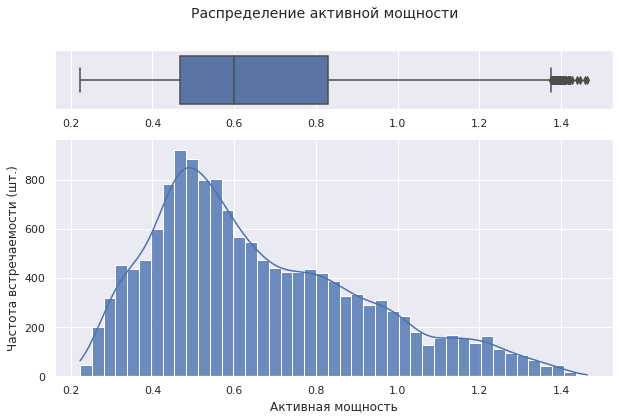

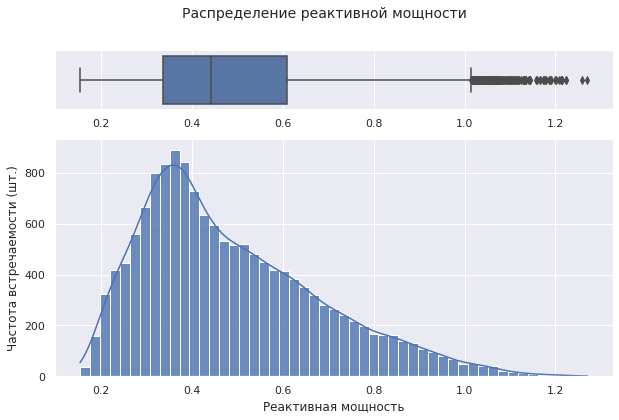

In [39]:
# строим графики для датафрейма df_arc_new
plot_box_hist(
    df_arc_new.drop(columns='key'),
    figsize=(10, 6),
    kde=True,
    **dict_arc_new
)

Распределение активной и реактивной мощностей выглядит адекватно, хотя и не является нормальным. Видны статистические выбросы, которые необходимо учитывать при обучении модели, удалять их из выборки нецелесообразно.

In [40]:
# создаём словарь числовых колонок датафрейма df_bulk_new
dict_bulk_new = {
    'bulk_1': ['Масса 1',
               'Распределение признака "Масса 1"'],
    'bulk_2': ['Масса 2',
               'Распределение признака "Масса 2"'],
    'bulk_3': ['Масса 3',
               'Распределение признака "Масса 3"'],
    'bulk_4': ['Масса 4',
               'Распределение признака "Масса 4"'],
    'bulk_5': ['Масса 5',
               'Распределение признака "Масса 5"'],
    'bulk_6': ['Масса 6',
               'Распределение признака "Масса 6"'],
    'bulk_7': ['Масса 7',
               'Распределение признака "Масса 7"'],
    'bulk_8': ['Масса 8',
               'Распределение признака "Масса 8"'],
    'bulk_9': ['Масса 9',
               'Распределение признака "Масса 9"'],
    'bulk_10': ['Масса 10',
               'Распределение признака "Масса 10"'],
    'bulk_11': ['Масса 11',
               'Распределение признака "Масса 11"'],
    'bulk_12': ['Масса 12',
               'Распределение признака "Масса 12"'],
    'bulk_13': ['Масса 13',
               'Распределение признака "Масса 13"'],
    'bulk_14': ['Масса 14',
               'Распределение признака "Масса 14"'],
    'bulk_15': ['Масса 15',
               'Распределение признака "Масса 15"']
}

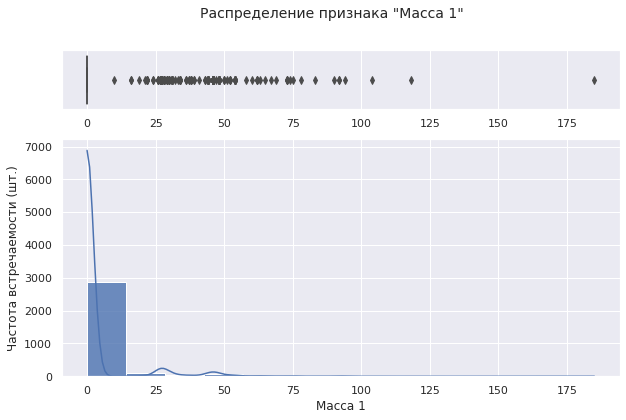

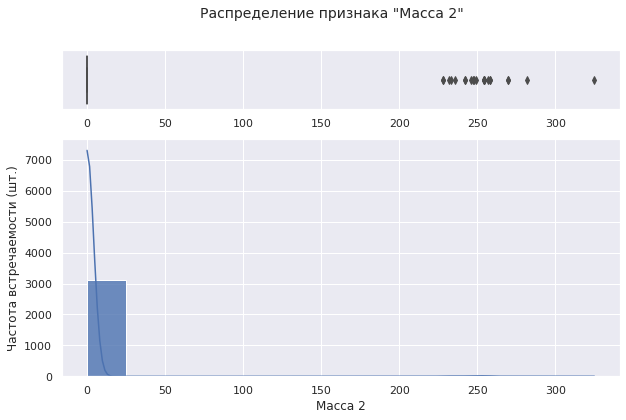

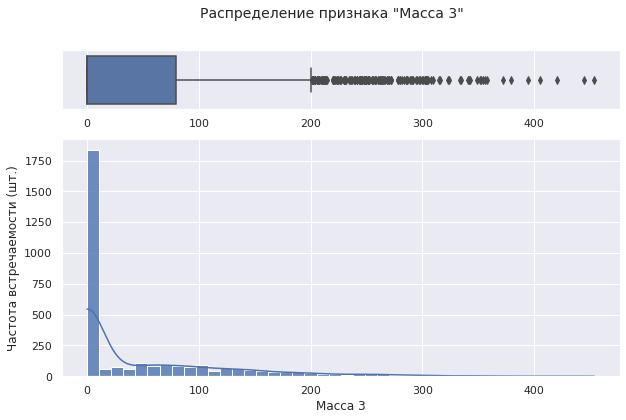

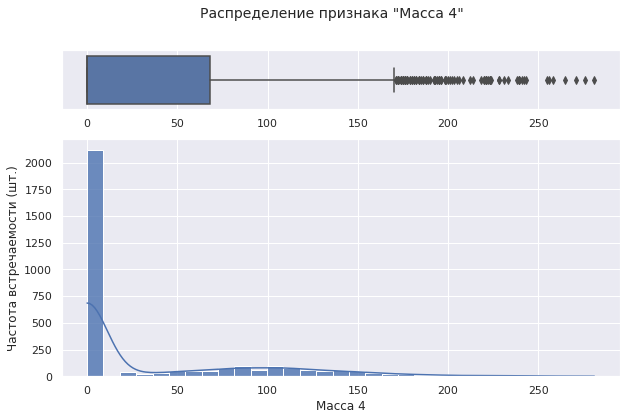

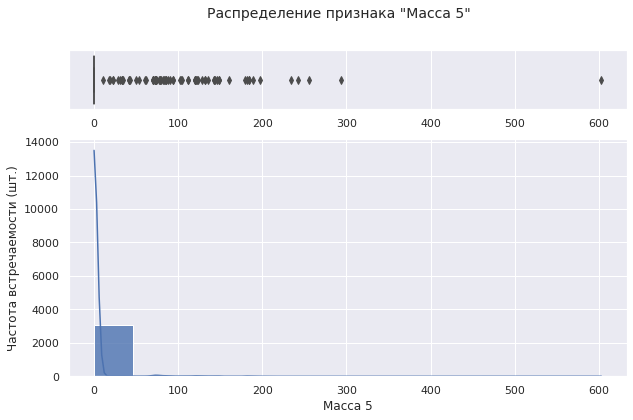

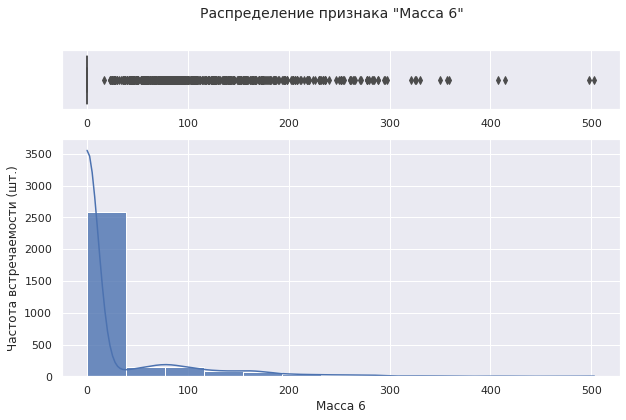

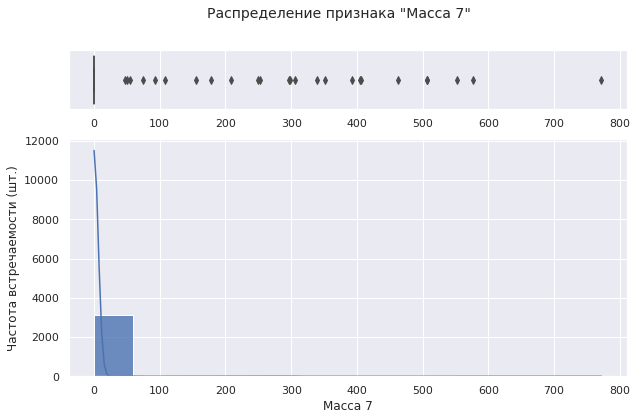

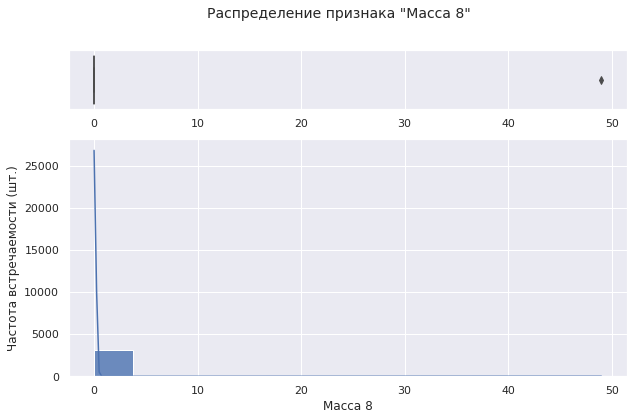

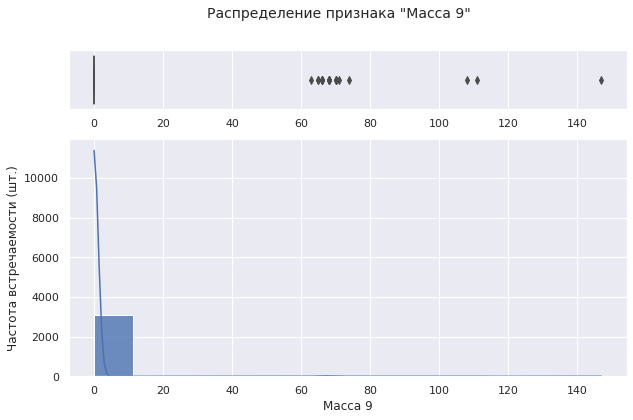

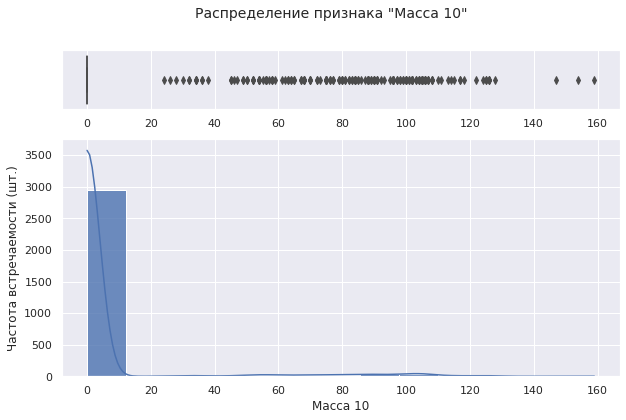

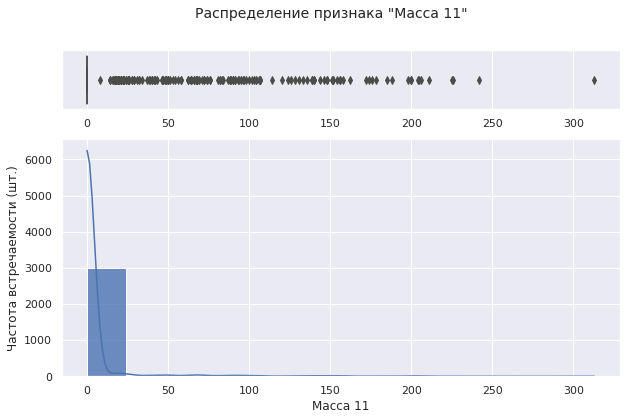

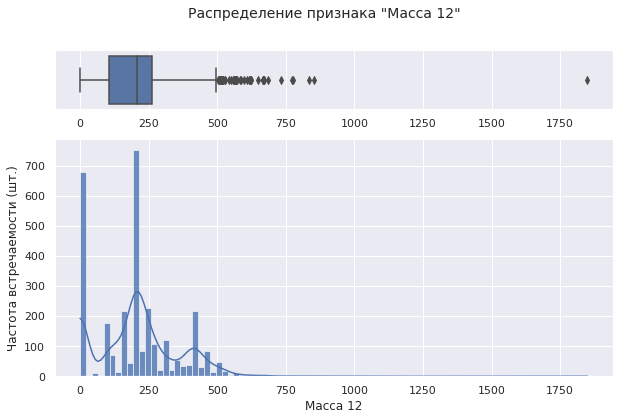

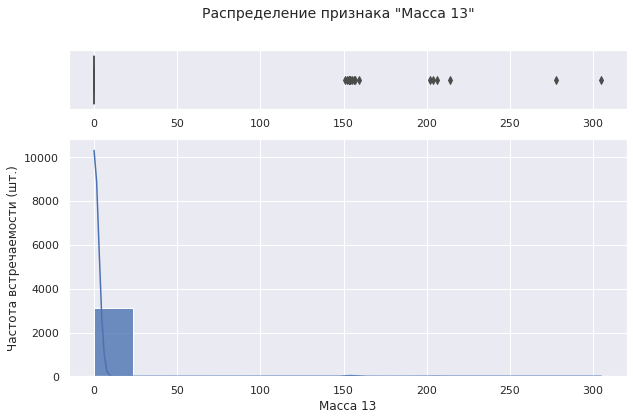

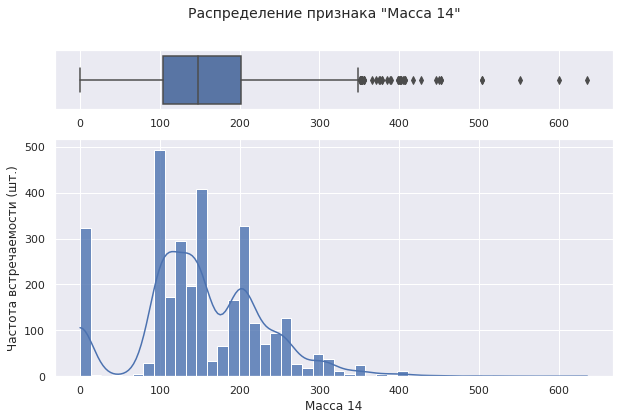

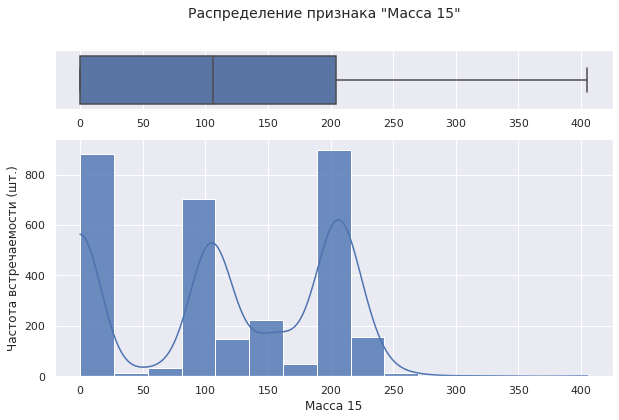

In [41]:
# строим графики для датафрейма df_bulk_new
plot_box_hist(
    df_bulk_new.drop(columns='key'),
    figsize=(10, 6),
    kde=True,
    **dict_bulk_new
)

Распределения всех признаков "Масса" неравномерны, большинство признаков имеет статистические выбросы, обусловленные большим количеством нулевых (пропущенных) значений. У признаков "Масса 12",  "Масса 14", "Масса 15" наблюдаются мультимодальные распределения.

In [42]:
# создаём словарь числовых колонок датафрейма df_gas_new
dict_gas_new = {
    'gas_1': ['Газ 1',
              'Распределение признака "Газ 1"']
}

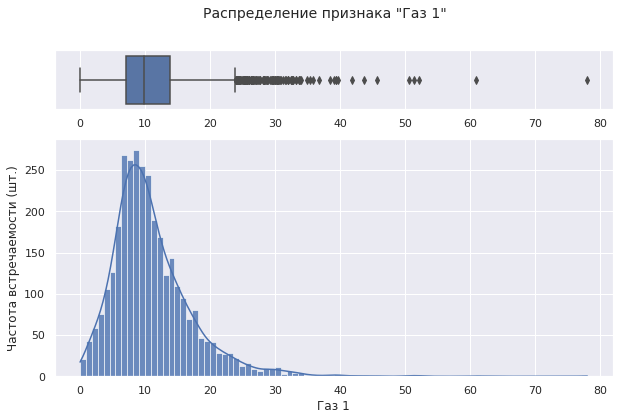

In [43]:
# строим графики для датафрейма df_gas_new
plot_box_hist(
    df_gas_new.drop(columns='key'),
    figsize=(10, 6),
    kde=True,
    **dict_gas_new
)

Распределение признака "Газ 1" адекватное, близкое к нормальному. Содержит статистические выбросы, которые мы должны оставить в выборке для более качественного обучения модели.

In [44]:
# создаём словарь числовых колонок датафрейма df_temp_new
dict_temp_new = {
    'temperature': ['Температура сплава',
                    'Распределение значений температуры сплава']
}

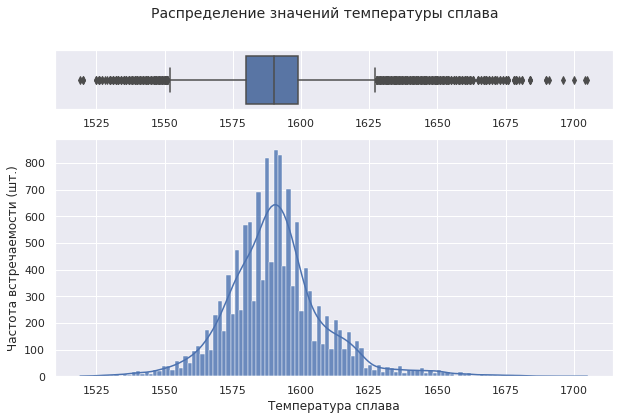

In [45]:
# строим графики для датафрейма df_temp_new
plot_box_hist(
    df_temp_new.drop(columns='key'),
    figsize=(10, 6),
    kde=True,
    **dict_temp_new
)

Распределение значений температуры сплава довольно симметричное, мультимодальное, с большим количеством статистических выбросов, которые мы должны оставить в выборке для более качественного обучения модели. Мультимодальность значений температуры обусловлена спецификой данных, поскольку для каждого ковша проводится несколько замеров температуры.

In [46]:
# создаём словарь числовых колонок датафрейма df_wire_new
dict_wire_new = {
    'wire_1': ['Провод 1',
               'Распределение признака "Провод 1"'],
    'wire_2': ['Провод 2',
               'Распределение признака "Провод 2"'],
    'wire_3': ['Провод 3',
               'Распределение признака "Провод 3"'],
    'wire_4': ['Провод 4',
               'Распределение признака "Провод 4"'],
    'wire_5': ['Провод 5',
               'Распределение признака "Провод 5"'],
    'wire_6': ['Провод 6',
               'Распределение признака "Провод 6"'],
    'wire_7': ['Провод 7',
               'Распределение признака "Провод 7"'],
    'wire_8': ['Провод 8',
               'Распределение признака "Провод 8"'],
    'wire_9': ['Провод 9',
               'Распределение признака "Провод 9"']
}

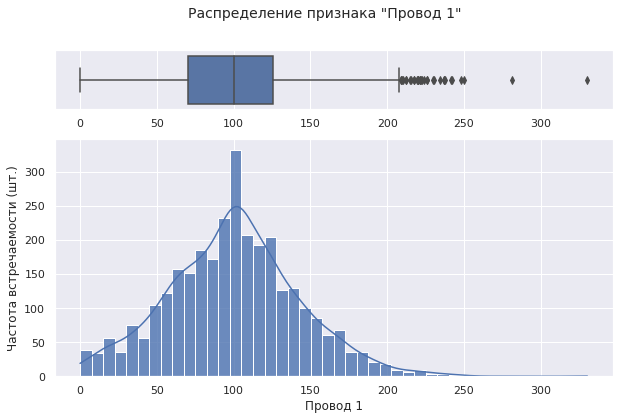

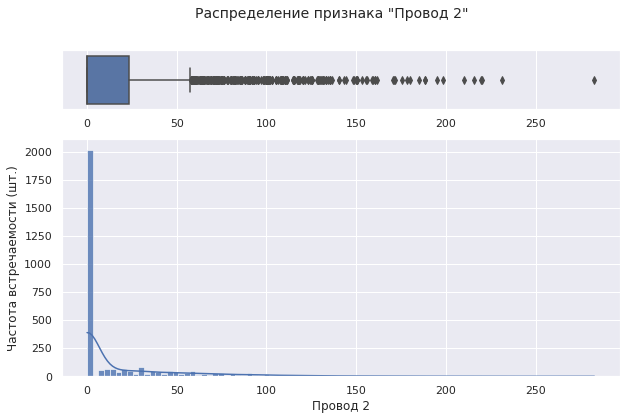

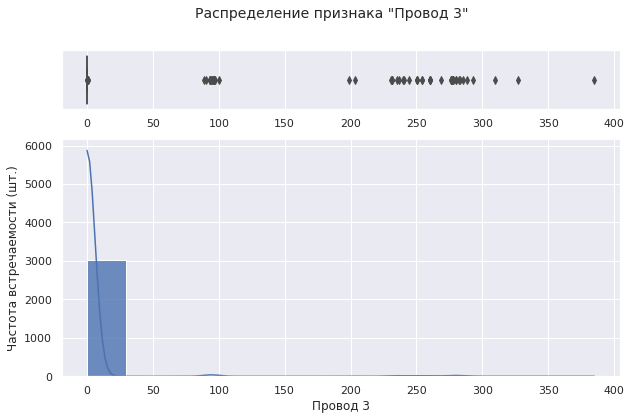

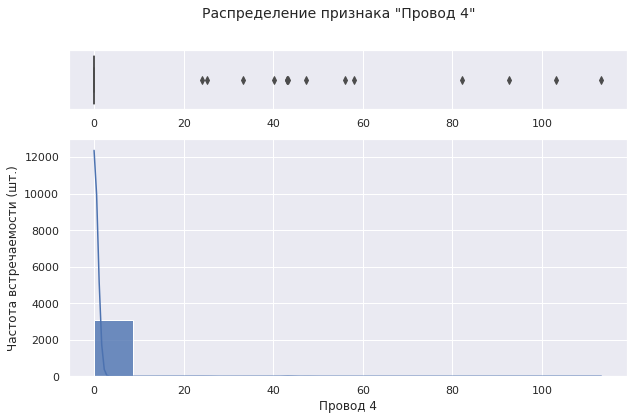

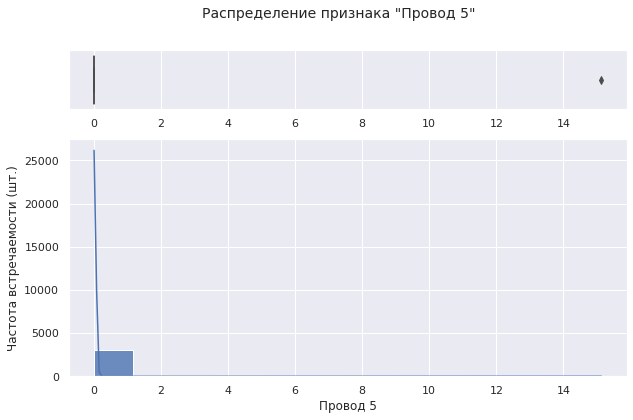

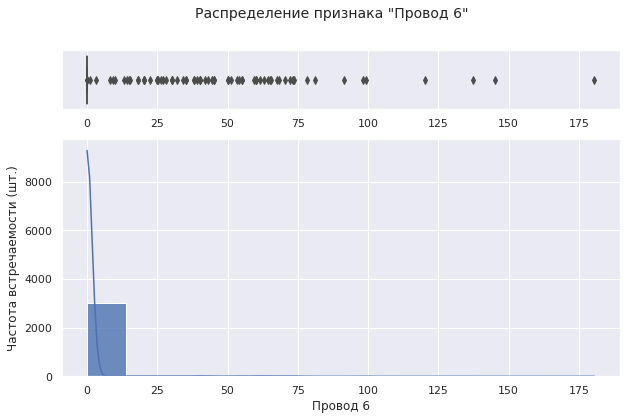

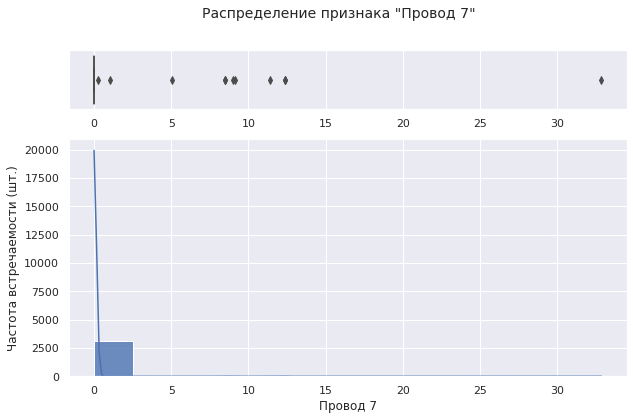

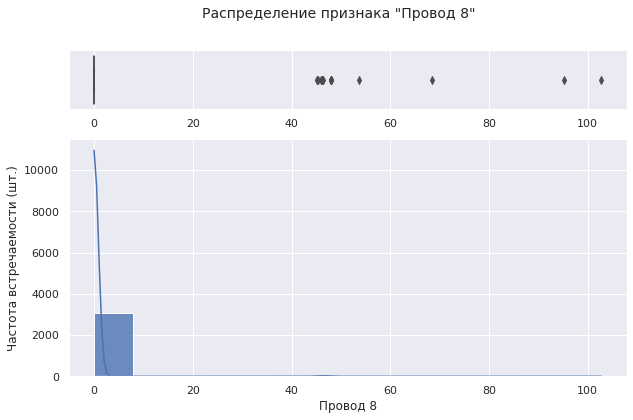

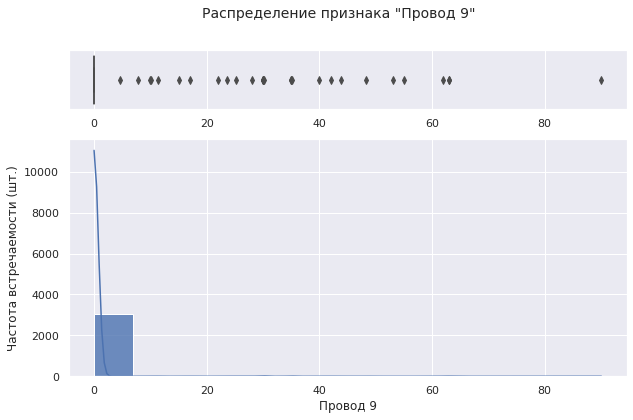

In [47]:
# строим графики для датафрейма df_wire_new
plot_box_hist(
    df_wire_new.drop(columns='key'),
    figsize=(10, 6),
    kde=True,
    **dict_wire_new
)

Распределение всех признаков "Провод", кроме признака "Провод 1", имеют выраженную унимодальность в нуле, обусловленную большим количеством пропущенных (нулевых) значений в признаках. Наиболее информативное распределение имеет признак "Провод 1" с медианным значение около 100 и статистическим выборосами, которые мы должны оставить в выборке для более качественного обучения модели.

### Вывод по результатам исследовательского анализа данных в первичных датафреймах

На этапе исследовательского анализа были обработаны следующие аномалии:

- из датафрейма `df_arc_new` были удалены записи, относящиеся к ключам с отрицательной реактивной мощностью;
- из датафрейма `df_temp_new` были удалены записи, относящиеся к ключам с температурой ниже 1400 градусов.

После предобработки все числовые признаки сильно вариативны за исключением целевого (`temperature`). Вариативность данных обусловлена как спецификой данных, так и выполненной предобработкой с заполненением пропущенных значений нулями.

Целевой признак `temperature` демонстрирует однородность распределения с коэффициентом вариации 1.2% после выполненной предобработки, что должно положительно сказаться на качестве обучения моделей.

По результатам выполненного исследовательского анализа мы можем выделить следующие признаки, которые будет уместно использовать для сборки общего датафрейма и обучения моделей:

- из признаков `active_power`, `reactive_power` датафрейма `df_arc_new` мы получим новый признак - количество энергии, затраченной на нагревание каждого ковша;
- из датафрейма `df_bulk_new` мы оставим только признаки с ненулевым третьим квартилем, а именно: `bulk_3`, `bulk_4`, `bulk_12`, `bulk_14`, `bulk_15`;
- признак `gas_1` возьмём без изменений из датафрейма `df_gas_new`;
- из датафрейма `df_temp_new` мы можем получить новый признак - начальную температуру сплава, который тоже будет полезен для обучения модели;
- из датафрейма `df_wire_new` мы также возьмём только признаки с ненулевым третьим квартилем, а именно `wire_1`, `wire_2`.

## Объединение данных в общий датафрейм

На данном этапе мы соберём общий датафрейм из признаков, которые мы определили на предыдущем шаге.

В финальный датафрейм войдут только те ковши, для которых есть информация во всех первичных датафреймах.

В процессе сборки мы также выполним ряд проверок данных на качество, чтобы исключить попадание в финальный датафрейм лишних или заведомо неверных данных.

Для начала поработаем с датафреймом `df_temp_new`:

- отберём строки с начальной температурой по каждому ковшу, составим из них новый датафрейм и удалим их из датафрейма `df_temp_new`;
- отберём строки с конечной температурой по каждому ковшу из датафрейма `df_temp_new`;
- объединим получившиеся датафреймы в один.
    
Таким образом мы получим датафрейм с входным признаком (начальной температурой сплава) и целевым признаком (конечной температурой сплава) для каждого ковша, при этом исключим ковши, для которых время начального и конечного измерений совпадает.

К этому датафрейму мы будем добавлять остальные признаки.

Чтобы не изменять первичный датафрейм, скопируем его:

In [48]:
# выполняем копирование датафрейма df_temp_new
copy_df_temp_new = df_temp_new.copy()

In [49]:
# находим индексы строк с начальной температурой по каждому ковшу
start_temp_idx = copy_df_temp_new.groupby('key')['measurement_time'].idxmin()
start_temp_idx.head()

key
1     0
2     6
3    11
4    17
5    22
Name: measurement_time, dtype: int64

In [50]:
# создаём датафрейм с начальными температурами сплава
df_start_temp = copy_df_temp_new.loc[start_temp_idx]
df_start_temp.columns = ['key', 'start_time', 'start_temp']
df_start_temp.head(10)

,key,start_time,start_temp
0,1,2019-05-03 11:02:04,1571.0
6,2,2019-05-03 11:34:04,1581.0
11,3,2019-05-03 12:06:44,1596.0
17,4,2019-05-03 12:39:27,1601.0
22,5,2019-05-03 13:11:03,1576.0
27,6,2019-05-03 13:46:41,1543.0
32,7,2019-05-03 14:16:36,1586.0
37,8,2019-05-03 14:53:46,1577.0
42,9,2019-05-03 15:36:33,1587.0
48,10,2019-05-03 16:13:59,1574.0


In [51]:
# удаляем найденные строки из первоначального датафрейма
copy_df_temp_new.drop(start_temp_idx, inplace=True)
copy_df_temp_new.head(10)

,key,measurement_time,temperature
1,1,2019-05-03 11:07:18,1604.0
2,1,2019-05-03 11:11:34,1618.0
3,1,2019-05-03 11:18:04,1601.0
4,1,2019-05-03 11:25:59,1606.0
5,1,2019-05-03 11:30:38,1613.0
7,2,2019-05-03 11:38:40,1577.0
8,2,2019-05-03 11:46:09,1589.0
9,2,2019-05-03 11:49:38,1604.0
10,2,2019-05-03 11:55:09,1602.0
12,3,2019-05-03 12:13:42,1597.0


In [52]:
# находим индексы строк с конечной температурой по каждому ковшу
end_temp_idx = copy_df_temp_new.groupby('key')['measurement_time'].idxmax()
end_temp_idx.head()

key
1     5
2    10
3    16
4    21
5    26
Name: measurement_time, dtype: int64

In [53]:
# создаём датафрейм с конечными температурами сплава
df_end_temp = copy_df_temp_new.loc[end_temp_idx]
df_end_temp.columns = ['key', 'end_time', 'end_temp']
df_end_temp.head(10)

,key,end_time,end_temp
5,1,2019-05-03 11:30:38,1613.0
10,2,2019-05-03 11:55:09,1602.0
16,3,2019-05-03 12:35:57,1599.0
21,4,2019-05-03 12:59:47,1625.0
26,5,2019-05-03 13:36:39,1602.0
31,6,2019-05-03 14:11:38,1596.0
36,7,2019-05-03 14:45:40,1599.0
41,8,2019-05-03 15:20:41,1598.0
47,9,2019-05-03 16:06:44,1592.0
54,10,2019-05-03 16:39:50,1593.0


In [54]:
# объединяем датафреймы df_start_temp и df_end_temp
df_final = df_end_temp.set_index('key').join(
    df_start_temp.set_index('key'),
    how='inner'
)
df_final.head(10)

,end_time,end_temp,start_time,start_temp
key,,,,
1,2019-05-03 11:30:38,1613.0,2019-05-03 11:02:04,1571.0
2,2019-05-03 11:55:09,1602.0,2019-05-03 11:34:04,1581.0
3,2019-05-03 12:35:57,1599.0,2019-05-03 12:06:44,1596.0
4,2019-05-03 12:59:47,1625.0,2019-05-03 12:39:27,1601.0
5,2019-05-03 13:36:39,1602.0,2019-05-03 13:11:03,1576.0
6,2019-05-03 14:11:38,1596.0,2019-05-03 13:46:41,1543.0
7,2019-05-03 14:45:40,1599.0,2019-05-03 14:16:36,1586.0
8,2019-05-03 15:20:41,1598.0,2019-05-03 14:53:46,1577.0
9,2019-05-03 16:06:44,1592.0,2019-05-03 15:36:33,1587.0


Теперь в датафрейме `df_arc_new` рассчитаем энергию, затрачиваемую на нагревание каждого ковша, а также выведем минимальное и максимальное значение времени нагрева для каждого ковша. Количество энергии при каждом нагреве рассчитывается как прозведение времени нагрева в секундах на квадратный корень из суммы квадратов активной и реактивной энергий.

In [55]:
# добавляем новую колонку в датафрейм df_arc_new
df_arc_new['heating_duration'] = (
    df_arc_new.end_heating - df_arc_new.start_heating
)
df_arc_new.head()

,key,start_heating,end_heating,active_power,reactive_power,heating_duration
0,1,2019-05-03 11:02:14,2019-05-03 11:06:02,0.305130,0.211253,0 days 00:03:48
1,1,2019-05-03 11:07:28,2019-05-03 11:10:33,0.765658,0.477438,0 days 00:03:05
2,1,2019-05-03 11:11:44,2019-05-03 11:14:36,0.580313,0.430460,0 days 00:02:52
3,1,2019-05-03 11:18:14,2019-05-03 11:24:19,0.518496,0.379979,0 days 00:06:05
4,1,2019-05-03 11:26:09,2019-05-03 11:28:37,0.867133,0.643691,0 days 00:02:28


In [56]:
# добавляем колонку с продолжительностью нагрева в секундах
df_arc_new['heating_duration_in_sec'] = (
    df_arc_new['heating_duration'].apply(lambda x: x.total_seconds())
)
df_arc_new.head()

,key,start_heating,end_heating,active_power,reactive_power,heating_duration,heating_duration_in_sec
0,1,2019-05-03 11:02:14,2019-05-03 11:06:02,0.305130,0.211253,0 days 00:03:48,228.0
1,1,2019-05-03 11:07:28,2019-05-03 11:10:33,0.765658,0.477438,0 days 00:03:05,185.0
2,1,2019-05-03 11:11:44,2019-05-03 11:14:36,0.580313,0.430460,0 days 00:02:52,172.0
3,1,2019-05-03 11:18:14,2019-05-03 11:24:19,0.518496,0.379979,0 days 00:06:05,365.0
4,1,2019-05-03 11:26:09,2019-05-03 11:28:37,0.867133,0.643691,0 days 00:02:28,148.0


In [57]:
# вычисляем значение энергии при каждом нагреве
df_arc_new['heating_energy'] = (
    df_arc_new['heating_duration_in_sec'] *
    (df_arc_new['active_power']**2 + df_arc_new['reactive_power']**2) ** 0.5
)
df_arc_new.head()

,key,start_heating,end_heating,active_power,reactive_power,heating_duration,heating_duration_in_sec,heating_energy
0,1,2019-05-03 11:02:14,2019-05-03 11:06:02,0.305130,0.211253,0 days 00:03:48,228.0,84.616003
1,1,2019-05-03 11:07:28,2019-05-03 11:10:33,0.765658,0.477438,0 days 00:03:05,185.0,166.928978
2,1,2019-05-03 11:11:44,2019-05-03 11:14:36,0.580313,0.430460,0 days 00:02:52,172.0,124.276277
3,1,2019-05-03 11:18:14,2019-05-03 11:24:19,0.518496,0.379979,0 days 00:06:05,365.0,234.630603
4,1,2019-05-03 11:26:09,2019-05-03 11:28:37,0.867133,0.643691,0 days 00:02:28,148.0,159.830252


Находим общее количество энергии, затраченной на нагревание каждого ковша, а также начальное и конечное время нагревания:

In [58]:
df_arc_new_sum = pd.pivot_table(
    df_arc_new,
    index='key',
    values=['start_heating', 'end_heating', 'heating_energy'],
    aggfunc={'start_heating': 'min',
             'end_heating': 'max',
             'heating_energy': 'sum'}
)
df_arc_new_sum.head()

,end_heating,heating_energy,start_heating
key,,,
1,2019-05-03 11:28:37,770.282114,2019-05-03 11:02:14
2,2019-05-03 11:53:18,481.760005,2019-05-03 11:34:14
3,2019-05-03 12:32:19,722.837668,2019-05-03 12:06:54
4,2019-05-03 12:57:50,683.455597,2019-05-03 12:39:37
5,2019-05-03 13:33:55,512.169934,2019-05-03 13:11:13


В датафрейм `df_final` добавим данные из датафрейма `df_arc_new_sum` и оставим в датафрейме `df_final` только те строки, для которых начальное и конечное время нагрева находится внутри промежутка времени измерения температуры:

In [59]:
# объединяем датафреймы
df_final = df_final.join(
    df_arc_new_sum,
    how='inner'
)
df_final.head()

,end_time,end_temp,start_time,start_temp,end_heating,heating_energy,start_heating
key,,,,,,,
1,2019-05-03 11:30:38,1613.0,2019-05-03 11:02:04,1571.0,2019-05-03 11:28:37,770.282114,2019-05-03 11:02:14
2,2019-05-03 11:55:09,1602.0,2019-05-03 11:34:04,1581.0,2019-05-03 11:53:18,481.760005,2019-05-03 11:34:14
3,2019-05-03 12:35:57,1599.0,2019-05-03 12:06:44,1596.0,2019-05-03 12:32:19,722.837668,2019-05-03 12:06:54
4,2019-05-03 12:59:47,1625.0,2019-05-03 12:39:27,1601.0,2019-05-03 12:57:50,683.455597,2019-05-03 12:39:37
5,2019-05-03 13:36:39,1602.0,2019-05-03 13:11:03,1576.0,2019-05-03 13:33:55,512.169934,2019-05-03 13:11:13


In [60]:
# фильтруем датафрейм df_final
df_final = df_final.query(
    'start_heating > start_time & end_heating < end_time'
)

In [61]:
# удаляем из датафрейма df_final колонки, которые больше не нужны
df_final.drop(columns=['end_heating', 'start_heating'], inplace=True)
df_final.head()

,end_time,end_temp,start_time,start_temp,heating_energy
key,,,,,
1,2019-05-03 11:30:38,1613.0,2019-05-03 11:02:04,1571.0,770.282114
2,2019-05-03 11:55:09,1602.0,2019-05-03 11:34:04,1581.0,481.760005
3,2019-05-03 12:35:57,1599.0,2019-05-03 12:06:44,1596.0,722.837668
4,2019-05-03 12:59:47,1625.0,2019-05-03 12:39:27,1601.0,683.455597
5,2019-05-03 13:36:39,1602.0,2019-05-03 13:11:03,1576.0,512.169934


Добавляем в датафрейм `df_final` признак `gas_1`:

In [62]:
df_final = df_final.join(
    df_gas_new.set_index('key'),
    how='inner'
)
df_final.head()

,end_time,end_temp,start_time,start_temp,heating_energy,gas_1
key,,,,,,
1,2019-05-03 11:30:38,1613.0,2019-05-03 11:02:04,1571.0,770.282114,29.749986
2,2019-05-03 11:55:09,1602.0,2019-05-03 11:34:04,1581.0,481.760005,12.555561
3,2019-05-03 12:35:57,1599.0,2019-05-03 12:06:44,1596.0,722.837668,28.554793
4,2019-05-03 12:59:47,1625.0,2019-05-03 12:39:27,1601.0,683.455597,18.841219
5,2019-05-03 13:36:39,1602.0,2019-05-03 13:11:03,1576.0,512.169934,5.413692


Формируем отдельный датафрейм со всеми данными о сыпучих и проволочных материалах. В этот же датафрейм мы добавим колонки с начальным и конечным временем добавления материалов в сплав.

In [63]:
# создаём датафрейм с информацией обо всех данных о легировании
df_bulk_wire = (
    df_bulk_new.set_index('key')
    .join(
        df_wire_new.set_index('key'),
        how='inner'
    )
    .join(
        df_bulk_time_new.set_index('key'),
        how='inner',
        lsuffix='_vol', rsuffix='_time'
    )
    .join(
    df_wire_time_new.set_index('key'),
    how='inner',
    lsuffix='_vol', rsuffix='_time'
    )
)
df_bulk_wire.head()

,bulk_1_vol,bulk_2_vol,bulk_3_vol,bulk_4_vol,bulk_5_vol,bulk_6_vol,bulk_7_vol,bulk_8_vol,bulk_9_vol,bulk_10_vol,bulk_11_vol,bulk_12_vol,bulk_13_vol,bulk_14_vol,bulk_15_vol,wire_1_vol,wire_2_vol,wire_3_vol,wire_4_vol,wire_5_vol,wire_6_vol,wire_7_vol,wire_8_vol,wire_9_vol,bulk_1_time,bulk_2_time,bulk_3_time,bulk_4_time,bulk_5_time,bulk_6_time,bulk_7_time,bulk_8_time,bulk_9_time,bulk_10_time,bulk_11_time,bulk_12_time,bulk_13_time,bulk_14_time,bulk_15_time,wire_1_time,wire_2_time,wire_3_time,wire_4_time,wire_5_time,wire_6_time,wire_7_time,wire_8_time,wire_9_time
key,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,43.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,206.0,0.0,150.0,154.0,60.059998,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaT,NaT,NaT,2019-05-03 11:28:48,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2019-05-03 11:24:31,NaT,2019-05-03 11:14:50,2019-05-03 11:10:43,2019-05-03 11:06:19,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
2,0.0,0.0,0.0,73.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,206.0,0.0,149.0,154.0,96.052315,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaT,NaT,NaT,2019-05-03 11:36:50,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2019-05-03 11:53:30,NaT,2019-05-03 11:48:37,2019-05-03 11:44:39,2019-05-03 11:36:50,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
3,0.0,0.0,0.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,205.0,0.0,152.0,153.0,91.160157,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaT,NaT,NaT,2019-05-03 12:32:39,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2019-05-03 12:27:13,NaT,2019-05-03 12:21:01,2019-05-03 12:16:16,2019-05-03 12:11:46,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
4,0.0,0.0,0.0,81.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,207.0,0.0,153.0,154.0,89.063515,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaT,NaT,NaT,2019-05-03 12:43:22,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2019-05-03 12:58:00,NaT,2019-05-03 12:51:11,2019-05-03 12:46:36,2019-05-03 12:43:22,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
5,0.0,0.0,0.0,78.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,203.0,0.0,151.0,152.0,89.238236,9.11456,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaT,NaT,NaT,2019-05-03 13:30:47,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2019-05-03 13:30:47,NaT,2019-05-03 13:34:12,2019-05-03 13:30:47,2019-05-03 13:20:44,2019-05-03 13:15:34,NaT,NaT,NaT,NaT,NaT,NaT,NaT


In [64]:
# добавляем колонки с начальным и конечным временем легирования
df_bulk_wire['start_alloying'] = (
    df_bulk_wire.loc[:, 'bulk_1_time':].apply(
        lambda x: np.min(x), axis=1
    )
)

df_bulk_wire['end_alloying'] = (
    df_bulk_wire.loc[:, 'bulk_1_time':].apply(
        lambda x: np.max(x), axis=1
    )
)
df_bulk_wire.head()

,bulk_1_vol,bulk_2_vol,bulk_3_vol,bulk_4_vol,bulk_5_vol,bulk_6_vol,bulk_7_vol,bulk_8_vol,bulk_9_vol,bulk_10_vol,bulk_11_vol,bulk_12_vol,bulk_13_vol,bulk_14_vol,bulk_15_vol,wire_1_vol,wire_2_vol,wire_3_vol,wire_4_vol,wire_5_vol,wire_6_vol,wire_7_vol,wire_8_vol,wire_9_vol,bulk_1_time,bulk_2_time,bulk_3_time,bulk_4_time,bulk_5_time,bulk_6_time,bulk_7_time,bulk_8_time,bulk_9_time,bulk_10_time,bulk_11_time,bulk_12_time,bulk_13_time,bulk_14_time,bulk_15_time,wire_1_time,wire_2_time,wire_3_time,wire_4_time,wire_5_time,wire_6_time,wire_7_time,wire_8_time,wire_9_time,start_alloying,end_alloying
key,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,43.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,206.0,0.0,150.0,154.0,60.059998,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaT,NaT,NaT,2019-05-03 11:28:48,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2019-05-03 11:24:31,NaT,2019-05-03 11:14:50,2019-05-03 11:10:43,2019-05-03 11:06:19,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2019-05-03 11:06:19,2019-05-03 11:28:48
2,0.0,0.0,0.0,73.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,206.0,0.0,149.0,154.0,96.052315,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaT,NaT,NaT,2019-05-03 11:36:50,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2019-05-03 11:53:30,NaT,2019-05-03 11:48:37,2019-05-03 11:44:39,2019-05-03 11:36:50,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2019-05-03 11:36:50,2019-05-03 11:53:30
3,0.0,0.0,0.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,205.0,0.0,152.0,153.0,91.160157,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaT,NaT,NaT,2019-05-03 12:32:39,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2019-05-03 12:27:13,NaT,2019-05-03 12:21:01,2019-05-03 12:16:16,2019-05-03 12:11:46,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2019-05-03 12:11:46,2019-05-03 12:32:39
4,0.0,0.0,0.0,81.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,207.0,0.0,153.0,154.0,89.063515,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaT,NaT,NaT,2019-05-03 12:43:22,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2019-05-03 12:58:00,NaT,2019-05-03 12:51:11,2019-05-03 12:46:36,2019-05-03 12:43:22,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2019-05-03 12:43:22,2019-05-03 12:58:00
5,0.0,0.0,0.0,78.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,203.0,0.0,151.0,152.0,89.238236,9.11456,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaT,NaT,NaT,2019-05-03 13:30:47,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2019-05-03 13:30:47,NaT,2019-05-03 13:34:12,2019-05-03 13:30:47,2019-05-03 13:20:44,2019-05-03 13:15:34,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2019-05-03 13:15:34,2019-05-03 13:34:12


In [65]:
# оставляем только нужные колонки
df_bulk_wire = df_bulk_wire[[
    'bulk_3_vol', 'bulk_4_vol', 'bulk_12_vol',
    'bulk_14_vol', 'bulk_15_vol', 'wire_1_vol',
    'wire_2_vol', 'start_alloying', 'end_alloying'
]]
df_bulk_wire.head()

,bulk_3_vol,bulk_4_vol,bulk_12_vol,bulk_14_vol,bulk_15_vol,wire_1_vol,wire_2_vol,start_alloying,end_alloying
key,,,,,,,,,
1,0.0,43.0,206.0,150.0,154.0,60.059998,0.00000,2019-05-03 11:06:19,2019-05-03 11:28:48
2,0.0,73.0,206.0,149.0,154.0,96.052315,0.00000,2019-05-03 11:36:50,2019-05-03 11:53:30
3,0.0,34.0,205.0,152.0,153.0,91.160157,0.00000,2019-05-03 12:11:46,2019-05-03 12:32:39
4,0.0,81.0,207.0,153.0,154.0,89.063515,0.00000,2019-05-03 12:43:22,2019-05-03 12:58:00
5,0.0,78.0,203.0,151.0,152.0,89.238236,9.11456,2019-05-03 13:15:34,2019-05-03 13:34:12


Присоединяем датафрейм `df_bulk_wire` к датафрейму `df_final`:

In [66]:
df_final = df_final.join(
    df_bulk_wire,
    how='inner'
)
df_final.head()

,end_time,end_temp,start_time,start_temp,heating_energy,gas_1,bulk_3_vol,bulk_4_vol,bulk_12_vol,bulk_14_vol,bulk_15_vol,wire_1_vol,wire_2_vol,start_alloying,end_alloying
key,,,,,,,,,,,,,,,
1,2019-05-03 11:30:38,1613.0,2019-05-03 11:02:04,1571.0,770.282114,29.749986,0.0,43.0,206.0,150.0,154.0,60.059998,0.00000,2019-05-03 11:06:19,2019-05-03 11:28:48
2,2019-05-03 11:55:09,1602.0,2019-05-03 11:34:04,1581.0,481.760005,12.555561,0.0,73.0,206.0,149.0,154.0,96.052315,0.00000,2019-05-03 11:36:50,2019-05-03 11:53:30
3,2019-05-03 12:35:57,1599.0,2019-05-03 12:06:44,1596.0,722.837668,28.554793,0.0,34.0,205.0,152.0,153.0,91.160157,0.00000,2019-05-03 12:11:46,2019-05-03 12:32:39
4,2019-05-03 12:59:47,1625.0,2019-05-03 12:39:27,1601.0,683.455597,18.841219,0.0,81.0,207.0,153.0,154.0,89.063515,0.00000,2019-05-03 12:43:22,2019-05-03 12:58:00
5,2019-05-03 13:36:39,1602.0,2019-05-03 13:11:03,1576.0,512.169934,5.413692,0.0,78.0,203.0,151.0,152.0,89.238236,9.11456,2019-05-03 13:15:34,2019-05-03 13:34:12


Оставляем в датафрейме `df_final` только строки, в которых начало и конец легирования находятся внутри цикла измерения температуры сплава для каждого ковша и удаляем ненужные колонки:

In [67]:
# фильтруем датафрейм
df_final = df_final.query(
    'start_alloying > start_time & end_alloying < end_time'
)

# удаляем из датафрейма ненужные колонки
df_final.drop(
    columns=['start_time', 'end_time', 'start_alloying', 'end_alloying'],
    inplace=True
)
df_final.head()

,end_temp,start_temp,heating_energy,gas_1,bulk_3_vol,bulk_4_vol,bulk_12_vol,bulk_14_vol,bulk_15_vol,wire_1_vol,wire_2_vol
key,,,,,,,,,,,
1,1613.0,1571.0,770.282114,29.749986,0.0,43.0,206.0,150.0,154.0,60.059998,0.00000
2,1602.0,1581.0,481.760005,12.555561,0.0,73.0,206.0,149.0,154.0,96.052315,0.00000
3,1599.0,1596.0,722.837668,28.554793,0.0,34.0,205.0,152.0,153.0,91.160157,0.00000
4,1625.0,1601.0,683.455597,18.841219,0.0,81.0,207.0,153.0,154.0,89.063515,0.00000
5,1602.0,1576.0,512.169934,5.413692,0.0,78.0,203.0,151.0,152.0,89.238236,9.11456


Познакомися с получившимся финальным датафреймом:

In [68]:
get_initial_info(df_final, 'df_final', n_rows=10)

Первые 10 строк датафрейма df_final:



,end_temp,start_temp,heating_energy,gas_1,bulk_3_vol,bulk_4_vol,bulk_12_vol,bulk_14_vol,bulk_15_vol,wire_1_vol,wire_2_vol
key,,,,,,,,,,,
1,1613.0,1571.0,770.282114,29.749986,0.0,43.0,206.0,150.0,154.0,60.059998,0.000000
2,1602.0,1581.0,481.760005,12.555561,0.0,73.0,206.0,149.0,154.0,96.052315,0.000000
3,1599.0,1596.0,722.837668,28.554793,0.0,34.0,205.0,152.0,153.0,91.160157,0.000000
4,1625.0,1601.0,683.455597,18.841219,0.0,81.0,207.0,153.0,154.0,89.063515,0.000000
5,1602.0,1576.0,512.169934,5.413692,0.0,78.0,203.0,151.0,152.0,89.238236,9.114560
6,1596.0,1543.0,839.231310,11.273392,0.0,117.0,204.0,201.0,154.0,99.109917,9.114560
7,1599.0,1586.0,613.576982,9.836267,0.0,117.0,204.0,152.0,154.0,98.061600,0.000000
8,1598.0,1577.0,619.129542,15.171553,0.0,99.0,410.0,252.0,153.0,155.282394,0.000000
9,1592.0,1587.0,570.113675,8.216623,0.0,117.0,107.0,99.0,203.0,113.393279,9.143681



--------------------------------------------------------------------------------
Общая информация о датафрейме df_final:

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2324 entries, 1 to 2499
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   end_temp        2324 non-null   float64
 1   start_temp      2324 non-null   float64
 2   heating_energy  2324 non-null   float64
 3   gas_1           2324 non-null   float64
 4   bulk_3_vol      2324 non-null   float64
 5   bulk_4_vol      2324 non-null   float64
 6   bulk_12_vol     2324 non-null   float64
 7   bulk_14_vol     2324 non-null   float64
 8   bulk_15_vol     2324 non-null   float64
 9   wire_1_vol      2324 non-null   float64
 10  wire_2_vol      2324 non-null   float64
dtypes: float64(11)
memory usage: 217.9 KB

--------------------------------------------------------------------------------
Количество уникальных значений в колонках датафрейма df_fina

end_temp            75
start_temp         133
heating_energy    2324
gas_1             2324
bulk_3_vol         265
bulk_4_vol         199
bulk_12_vol        303
bulk_14_vol        254
bulk_15_vol        143
wire_1_vol        1810
wire_2_vol         563
dtype: int64


--------------------------------------------------------------------------------
Количество пропусков в колонках датафрейма df_final (шт.):



end_temp          0
start_temp        0
heating_energy    0
gas_1             0
bulk_3_vol        0
bulk_4_vol        0
bulk_12_vol       0
bulk_14_vol       0
bulk_15_vol       0
wire_1_vol        0
wire_2_vol        0
dtype: int64


--------------------------------------------------------------------------------
Количество пропусков в колонках датафрейма df_final (проценты):



end_temp          0.0
start_temp        0.0
heating_energy    0.0
gas_1             0.0
bulk_3_vol        0.0
bulk_4_vol        0.0
bulk_12_vol       0.0
bulk_14_vol       0.0
bulk_15_vol       0.0
wire_1_vol        0.0
wire_2_vol        0.0
dtype: float64


--------------------------------------------------------------------------------
Количество полных (явных) дубликатов в датафрейме df_final:



0


--------------------------------------------------------------------------------
Колонки датафрейма df_final:



Index(['end_temp', 'start_temp', 'heating_energy', 'gas_1', 'bulk_3_vol',
       'bulk_4_vol', 'bulk_12_vol', 'bulk_14_vol', 'bulk_15_vol', 'wire_1_vol',
       'wire_2_vol'],
      dtype='object')

### Вывод по результатам объединения данных

В результате объединения данных был получен датафрейм `df_final`, содержащий 2324 уникальных записи о плавлении стали в ковшах.

При объединении мы рассматривали каждый ковш как неделимую единицую технологического процесса, поэтому в финальную выборку попали только те ковши, по которым была информация во всех первоначальных датафреймах, а также у которых верно отражена временная динамика нагреваний и легирования, то есть все технологические манипуляции проведены после первого измерения температуры и завершены до последнего измерения температуры сплава.

Финальный датафрейм содержит следующие колонки:

- `end_temp` - конечная температура сплава (целевой признак);
- `start_temp`- начальная температура сплава;
- `heating_energy` - энергия, затраченная на весь цикл нагревания ковша;
- `gas_1` - объём инертного газа;
- `bulk_3_vol`, `bulk_4_vol`, `bulk_12_vol`, `bulk_14_vol`, `bulk_15_vol` - объёмы сыпучих материалов;
- `wire_1_vol`, `wire_2_vol` - объёмы проволочных материалов.

В финальном датафрейме все данные числовые, имеют тип `float64`, пропущенных значений нет.

Полных (явных) дубликатов в финальном датафрейме не обнаружено.

## Предобработка и исследовательский анализ данных объединённого датафрейма

In [69]:
# проверяем значения входной и целевой температур на одинаковость
(df_final.end_temp == df_final.start_temp).sum()

36

Мы видим, что в финальном датафрейме есть 36 записей, в которых начальная температура равна целевой температуре. Нам не нужны такие записи, поскольку это утечка целевого признака, поэтому удалим их из датафрейма `df_final`:

In [70]:
df_final = df_final.query('end_temp != start_temp')

Проведём исследовательский анализ финального датафрейма:

In [71]:
# выводим статистическую информацию по df_final
get_stat_data(df_final)

,count,mean,std,min,25%,50%,75%,max,var%
end_temp,2288.0,1593.376748,11.185662,1541.000000,1587.000000,1593.000000,1598.000000,1653.000000,0.702010
start_temp,2288.0,1587.278409,23.749933,1519.000000,1571.000000,1587.000000,1603.000000,1660.000000,1.496268
heating_energy,2288.0,671.660226,320.078893,33.430208,460.880024,632.656414,844.407213,4546.405812,47.654883
gas_1,2288.0,11.401620,6.405150,0.008399,7.302420,10.106744,14.223578,77.995040,56.177544
bulk_3_vol,2288.0,47.615385,75.472213,0.000000,0.000000,0.000000,80.000000,454.000000,158.503839
bulk_4_vol,2288.0,37.208479,58.684521,0.000000,0.000000,0.000000,77.000000,281.000000,157.718140
bulk_12_vol,2288.0,208.881556,157.297602,0.000000,105.000000,206.000000,282.250000,1849.000000,75.304687
bulk_14_vol,2288.0,154.183129,81.577683,0.000000,105.000000,149.000000,204.000000,636.000000,52.909604
bulk_15_vol,2288.0,120.262675,84.742577,0.000000,0.000000,107.000000,204.000000,405.000000,70.464570
wire_1_vol,2288.0,102.416677,43.643089,0.000000,73.204559,101.058359,127.840439,330.314424,42.613264


Можно видеть, что данные по температуре сплава однородны, что подтверждается малыми коэффициентами вариации. Остальные данные высоко вариативны и имеют выбросы, что подтверждается наличием скошенностей их распределений.

In [72]:
# создаём словарь колонок датафрейма df_final
dict_df_final = {
    'end_temp': ['Конечная температура сплава',
                 'Распределение конечной температуры сплава'],
    'start_temp': ['Начальная температура сплава',
                   'Распределение начальной температуры сплава'],
    'heating_energy': ['Энергия',
                       'Распределение энергии, затраченной на \
нагревание сплава'],
    'gas_1': ['Объём инертного газа',
              'Распределение объёма инертного газа'],
    'bulk_3_vol': ['Масса 3',
                   'Распределение признака "Масса 3"'],
    'bulk_4_vol': ['Масса 4',
                   'Распределение признака "Масса 4"'],
    'bulk_12_vol': ['Масса 12',
                    'Распределение признака "Масса 12"'],
    'bulk_14_vol': ['Масса 14',
                    'Распределение признака "Масса 14"'],
    'bulk_15_vol': ['Масса 15',
                    'Распределение признака "Масса 15"'],
    'wire_1_vol': ['Провод 1',
                   'Распределение признака "Провод 1"'],
    'wire_2_vol': ['Провод 2',
                   'Распределение признака "Провод 2"']
}

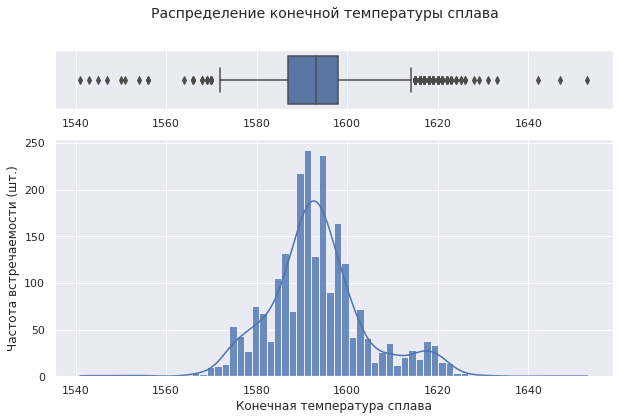

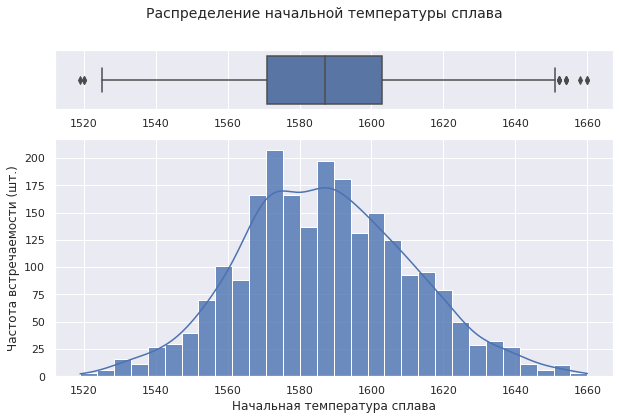

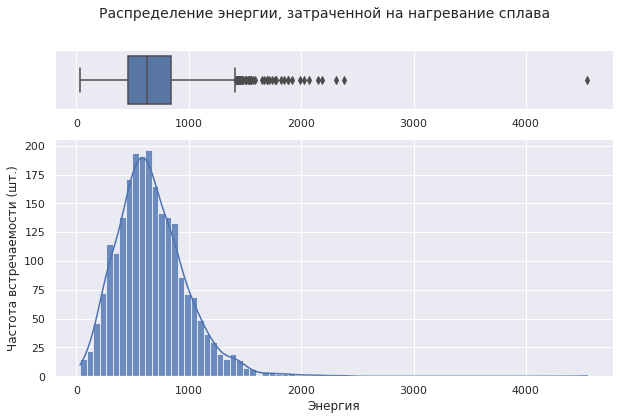

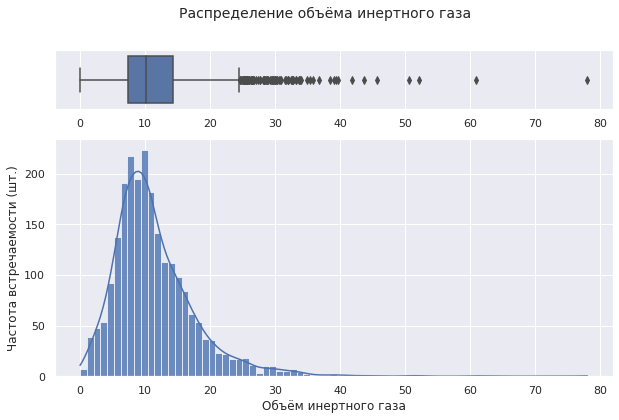

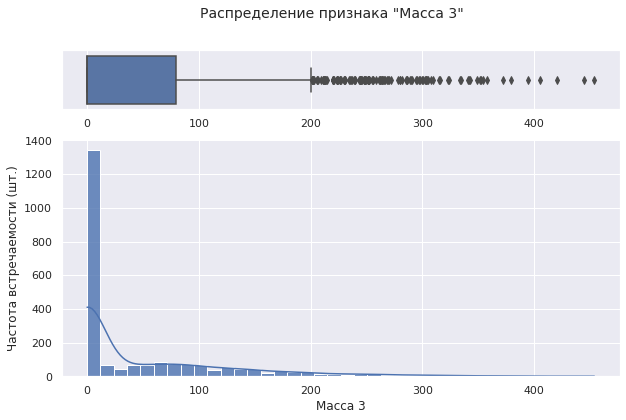

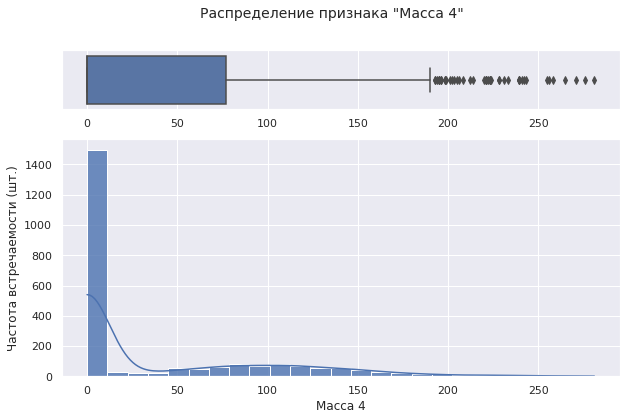

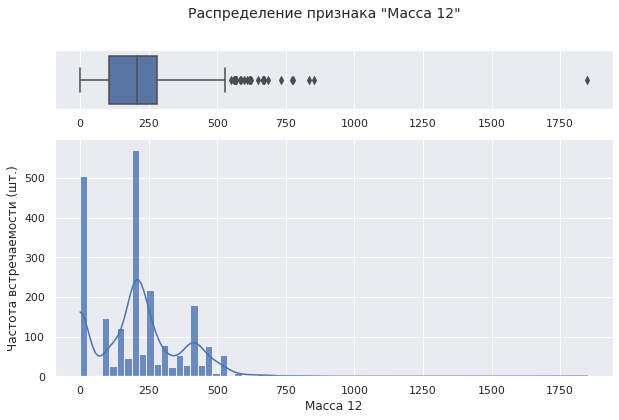

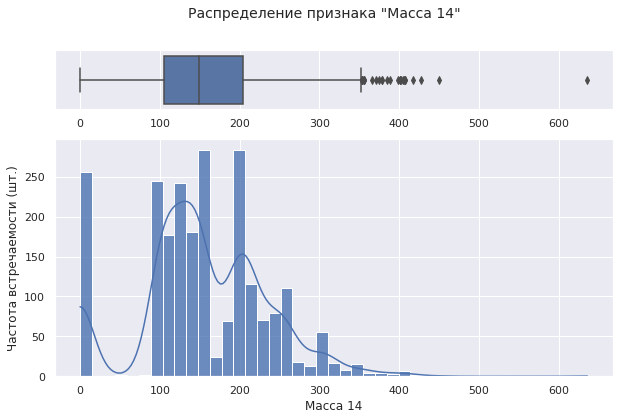

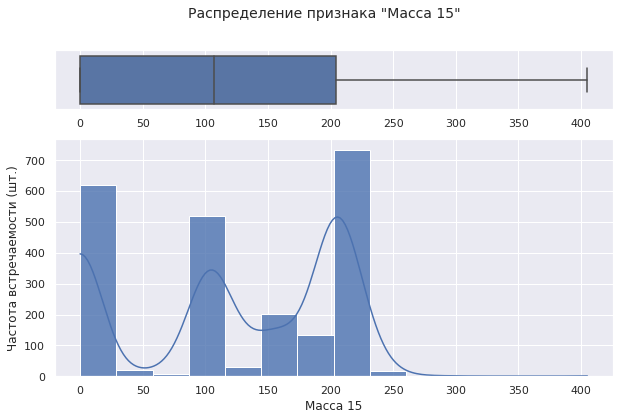

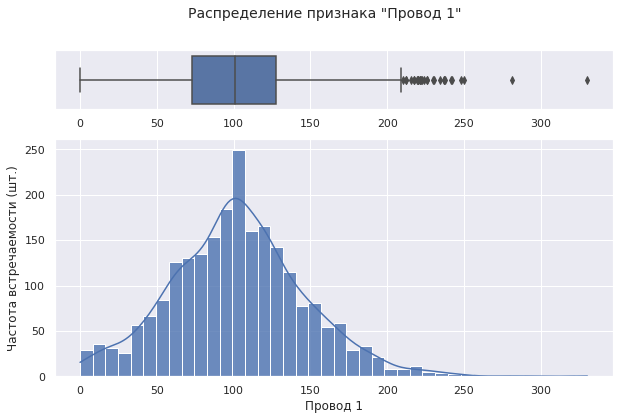

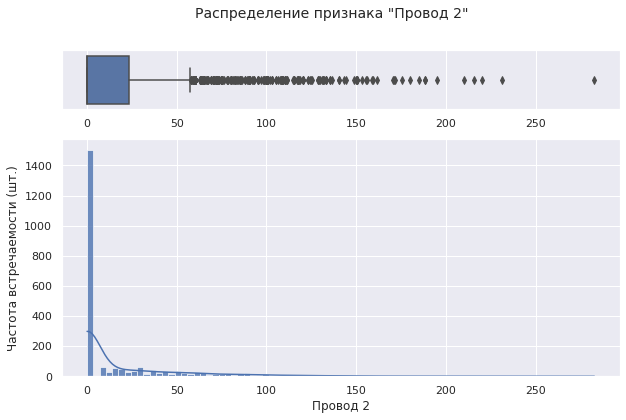

In [73]:
# строим графики для датафрейма df_final
plot_box_hist(
    df_final,
    figsize=(10, 6),
    kde=True,
    **dict_df_final
)

### Вывод по результатам предобработки и исследовательского анализа данных объединённого датафрейма

Из объединённого датафрейма были удалены 36 записей, в которых начальная и конечная температрура сплава совпадают, чтобы не допустить утечки целевого признака.

Распределение признака `end_temp` имеет выраженную бимодальность: около 1590 градусов и около 1620 градусов. Похожая картина наблюдается и у признака `start_temp`: бимодальность около 1570 градусов и около 1590 градусов.

Распределения признаков `heating_energy` и `gas_1` схожи с нормальным, демонстрируют стастические выбросы, которые мы должны учитывать при обучении моделей.

Распределения признаков с информацией о легировании сплава демонстрируют высокую неоднородность и большое количество статистических выбросов, которые также должны быть учтены при обучении моделей.

## Корреляционный анализ признаков объединённого датафрейма

In [74]:
# создаём список колонок с числовыми данными
interval_cols = df_final.columns

In [75]:
# создаём список с подписями признаков
tick_labels = [
    'Конечная температура сплава',
    'Начальная температура сплава',
    'Энергия',
    'Объём инертного газа',
    'Масса 3',
    'Масса 4',
    'Масса 12',
    'Масса 14',
    'Масса 15',
    'Провод 1',
    'Провод 2'
]

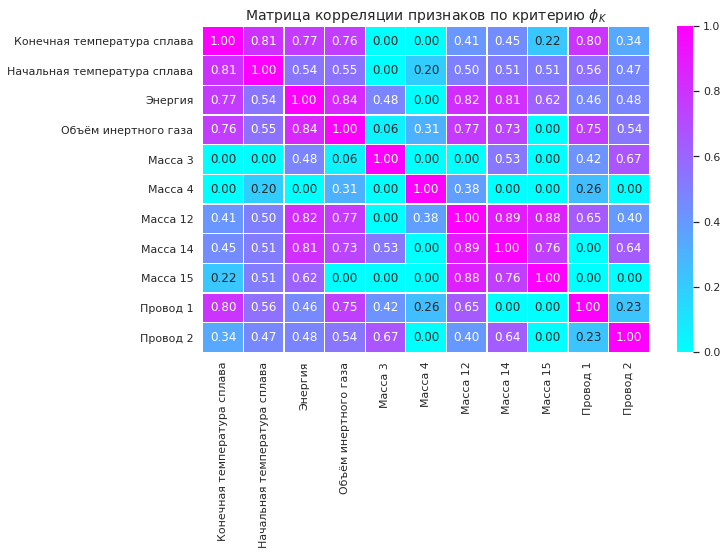

In [76]:
# получаем матрицу корреляции для df_final
corr_matrix = (df_final
               .phik_matrix(interval_cols=interval_cols, bins=100))

# визуализируем матрицу корреляции для df_final
fig, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(corr_matrix,
            annot=True,
            fmt='.2f',
            cmap='cool',
            linewidths=.3,
            xticklabels=tick_labels,
            yticklabels=tick_labels)
plt.title('Матрица корреляции признаков по критерию $\phi_K$', fontsize=14);

Мы видим, что входной признак "Масса 12" демонстрирует высокую корреляцию с входными признаками "Масса 14" и "Масса 15" с коэффициентами корреляции 0.89 и 0.88 соответственно, что можно считать мультиколленеарностью признака "Масса 12" с признаками "Масса 14" и "Масса 15". Поэтому удалим признак "Масса 12" из датафрейма:

In [77]:
df_final.drop(columns='bulk_12_vol', inplace=True)

In [78]:
# создаём функцию для построения диаграмм рассеяния
def plot_scat(dataframe,
              *legend_titles,
              y=None,
              ylabel=None,
              hue=None,
              legend=False,
              figsize=None,
              hue_order=None,
              bbox_to_anchor=(1.0, 1.0),
              loc='upper left',
              **columns):
    # список legend_title содержит кортежи категориальных признаков и
    # их переводов для каждой пары x, y
    # ключи словаря columns - названия колонок датафрейма
    # значения словаря columns - список [xlabel, title]
    for column, labels in columns.items():
        if hue:
            for hue, legend_title in legend_titles:
                fig, ax = plt.subplots(figsize=figsize)
                sns.scatterplot(data=dataframe,
                                x=column,
                                y=y,
                                hue=hue,
                                hue_order=hue_order)
                plt.xlabel(labels[0])
                plt.ylabel(ylabel)
                plt.title(labels[1])
                if legend:
                    plt.legend(title=legend_title,
                               bbox_to_anchor=bbox_to_anchor,
                               loc=loc)
                plt.show()
        else:
            fig, ax = plt.subplots(figsize=figsize)
            sns.scatterplot(data=dataframe,
                            x=column,
                            y=y)
            plt.xlabel(labels[0])
            plt.ylabel(ylabel)
            plt.title(labels[1], fontsize=14)
            plt.show()

In [79]:
# создаём словарь колонок для диаграмм рассеяния
dict_df_final_scat = {
    'start_temp': ['Начальная температура сплава',
                   'Зависимость конечной температуры сплава от \
начальной температуры сплава'],
    'heating_energy': ['Энергия',
                       'Зависимость конечной температуры сплава от \
затраченной энергии'],
    'gas_1': ['Объём инертного газа',
              'Зависимость конечной температуры сплава от объёма \
инертного газа'],
    'bulk_3_vol': ['Масса 3',
                   'Зависимость конечной температуры сплава от \
признака "Масса 3"'],
    'bulk_4_vol': ['Масса 4',
                   'Зависимость конечной температуры сплава от \
признака "Масса 4"'],
    'bulk_14_vol': ['Масса 14',
                    'Зависимость конечной температуры сплава от \
признака "Масса 14"'],
    'bulk_15_vol': ['Масса 15',
                    'Зависимость конечной температуры сплава от \
признака "Масса 15"'],
    'wire_1_vol': ['Провод 1',
                   'Зависимость конечной температуры сплава от \
признака "Провод 1"'],
    'wire_2_vol': ['Провод 2',
                   'Зависимость конечной температуры сплава от \
признака "Провод 2"']
}

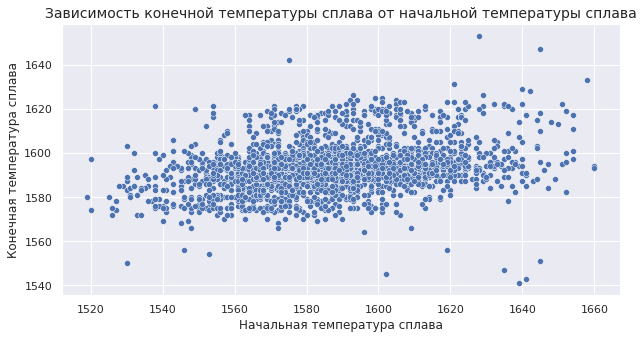

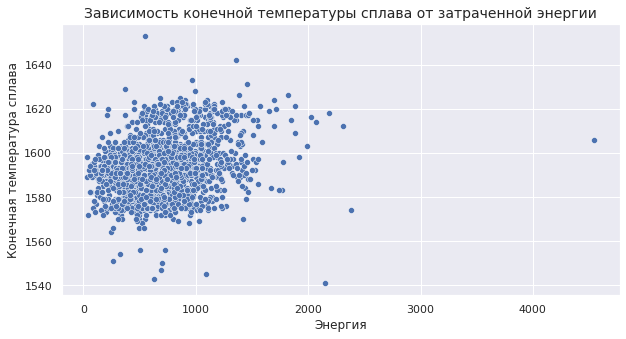

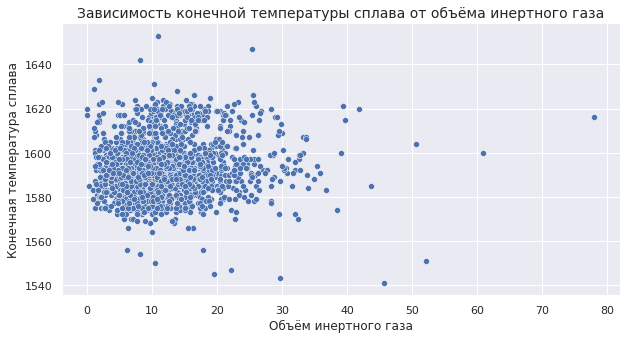

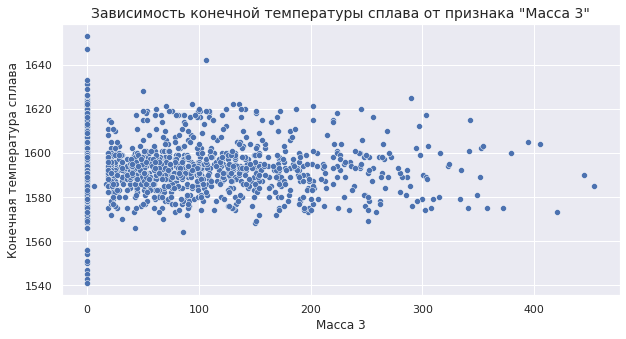

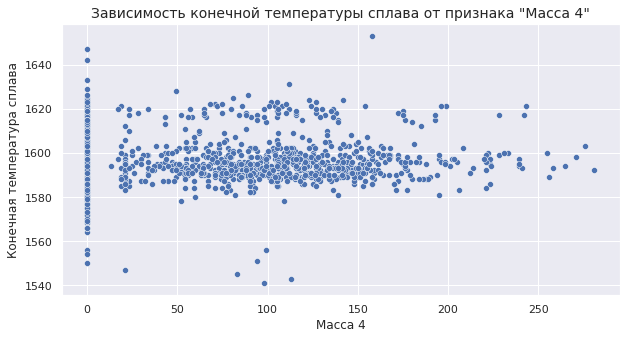

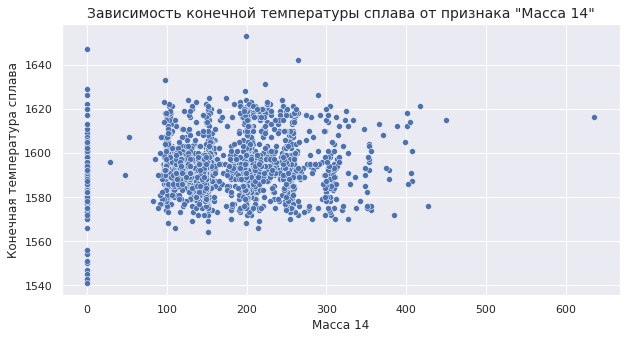

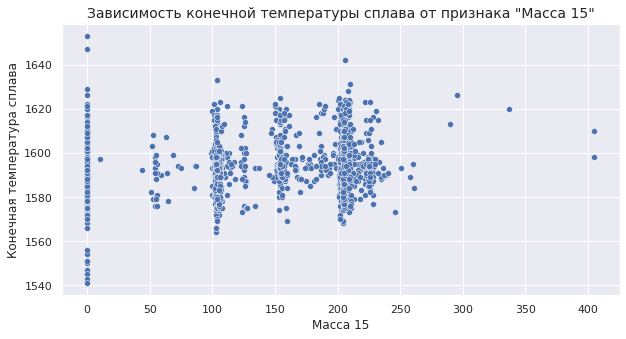

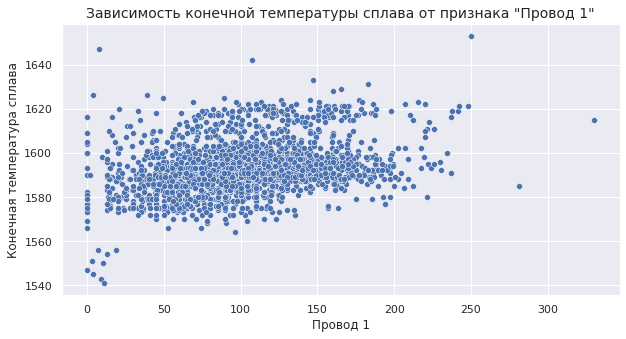

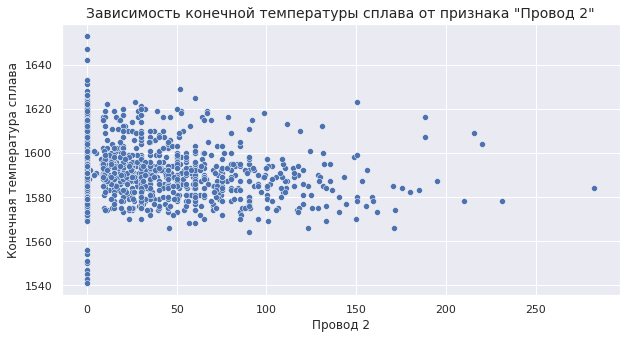

In [80]:
# строим диаграммы рассеяния
plot_scat(
    df_final,
    y='end_temp',
    ylabel='Конечная температура сплава',
    figsize=(10, 5),
    **dict_df_final_scat
)

### Вывод по результатам корреляционного анализа признаков объединённого датафрейма

Корреляция целевого и входных признаков находится в диапазоне от очень слабой до высокой с максимальным коэффициентом корреляции 0.81, что говорит об отсутствии утечки целевого признака.

На данном этапе из финального датафрейма был удален входной признак `bulk_12_vol`, поскольку он демонстрирует высокую корреляцию с входными признаками `bulk_14_vol` и `bulk_15_vol` с коэффициентами корреляции 0.89 и 0.88 соответственно, что можно считать мультиколленеарностью.

Небольшие линейные тренды можно различить в зависимостях конечной температуры от следующих входных признаков:

- начальная температура;
- энергия;
- признак `wire_1_vol`.

Выраженной нелинейности в зависимостях целевого признака от входных признаков не наблюдается, поэтому дополнительных преобразований имеющих признаков не потребуется для более качественного обучения моделей.

## Подготовка финальной выборки для обучения моделей

In [81]:
# делим финальную выборку на тестовую и тренировочную
df_train, df_test = train_test_split(
    df_final,
    random_state=RANDOM_STATE,
    test_size=TEST_SIZE
)

# проверяем размерности выборок после разделения
print(f'Количество строк в тренировочной выборке: {df_train.shape[0]}')
print(f'Количество колонок в тренировочной выборке: {df_train.shape[1]}')
print(f'Размерность тренировочной выборки: {df_train.shape}')
print(f"\n{'-' * 80}")
print(f'Количество строк в тестовой выборке: {df_test.shape[0]}')
print(f'Количество колонок в тестовой выборке: {df_test.shape[1]}')
print(f'Размерность тестовой выборки: {df_test.shape}')

Количество строк в тренировочной выборке: 1716
Количество колонок в тренировочной выборке: 10
Размерность тренировочной выборки: (1716, 10)

--------------------------------------------------------------------------------
Количество строк в тестовой выборке: 572
Количество колонок в тестовой выборке: 10
Размерность тестовой выборки: (572, 10)


In [82]:
# проверяем тренировочную выборку на наличие полных дубликатов
print('Количество полных дубликатов в датафрейме df_train:',
      df_train.duplicated().sum())

Количество полных дубликатов в датафрейме df_train: 0


In [83]:
# разделяем признаки на входные и целевые
X_train = df_train.drop(columns='end_temp')
y_train = df_train['end_temp']
X_test = df_test.drop(columns='end_temp')
y_test = df_test['end_temp']

# проверяем размерности получившихся выборок
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1716, 9), (572, 9), (1716,), (572,))

**Вывод**

Финальный датафрейм был разделен на тренировочную и тестовую выборки в соотношении 3:1.
Количество входных признаков: 9.

Полных дубликатов в тренировочной выборке после удаления признака `bulk_12_vol` не обнаружено.

## Обучение с учителем. Задача регрессии.

В данном разделе мы решим задачу регрессии путём обучения с учителем следующих моделей:

 - `Ridge`;
 - `Lasso`;
 - `SVR`;
 - `kNN`;
 - `DecisionTree`;
 - `LightGBM`.
 
Для каждой модели мы подберём гиперпараметры и проверим качество моделей при кросс-валидации.

Успешно обученная модель должна иметь значение метрики MAE не более 6.8 градусов.

In [84]:
# создаём функцию для поискаи гиперпараметров
def search_best_params(hyper_param_search_method,
                       model,
                       param_grid,
                       cv=5,
                       scoring=None,
                       random_state=None,
                       X_train=None,
                       y_train=None,
                       scoring_name=None):
    # инициализируем модель для поиска лучших гиперпараметов
    if hyper_param_search_method == OptunaSearchCV:
        gs = hyper_param_search_method(
            model,
            param_grid,
            cv=cv,
            scoring=scoring,
            random_state=random_state,
            n_jobs=1
        )
    elif hyper_param_search_method == GridSearchCV:
        gs = hyper_param_search_method(
            model,
            param_grid,
            cv=cv,
            scoring=scoring,
            n_jobs=-1
        )
        
    elif hyper_param_search_method == RandomSearchCV:
        gs = hyper_param_search_method(
            model,
            param_grid,
            cv=cv,
            scoring=scoring,
            random_state=random_state,
            n_jobs=-1,
        )

    # запускаем поиск гиперпараметров
    gs.fit(X_train, y_train)

    # получаем лучшую метрику при кросс-валидации
    print(f'Лучший результат метрики {scoring_name} при кросс-валидации:\n',
          gs.best_score_)

    # получаем лучшие гиперпараметры при кросс-валидации
    print(f'Лучшая модель при кросс-валидации:\n',
          gs.best_estimator_)
    
    return gs

### Обучение модели линейной регрессии с L1-регуляризацией

In [85]:
# инициализируем модель для обучения
ridge_pipe = Pipeline(
    [
        ('scaler', StandardScaler()),
        ('ridge', Ridge(random_state=RANDOM_STATE))
    ]
)

# задаем гиперпараметры для перебора
param_grid = {
    'ridge__alpha': FloatDistribution(0.01, 15, step=0.01)
}

# выполняем поиск гиперпараметров
ridge_gs = search_best_params(OptunaSearchCV,
                              ridge_pipe,
                              param_grid,
                              random_state=RANDOM_STATE,
                              X_train=X_train,
                              y_train=y_train,
                              scoring='neg_mean_absolute_error',
                              scoring_name='MAE')

# обучаем лучшую модель
ridge_best_model = ridge_gs.best_estimator_.fit(X_train, y_train)

/tmp/ipykernel_63/3282191492.py:13: ExperimentalWarning: OptunaSearchCV is experimental (supported from v0.17.0). The interface can change in the future.
  gs = hyper_param_search_method(
[I 2024-08-17 11:10:02,615] A new study created in memory with name: no-name-e218ba99-e99a-449c-8cba-4ab2259b9ce3
[I 2024-08-17 11:10:02,699] Trial 0 finished with value: -6.836721218031537 and parameters: {'ridge__alpha': 8.55}. Best is trial 0 with value: -6.836721218031537.
[I 2024-08-17 11:10:02,805] Trial 1 finished with value: -6.83706672257325 and parameters: {'ridge__alpha': 3.27}. Best is trial 0 with value: -6.836721218031537.
[I 2024-08-17 11:10:02,912] Trial 2 finished with value: -6.837261013311306 and parameters: {'ridge__alpha': 0.46}. Best is trial 0 with value: -6.836721218031537.
[I 2024-08-17 11:10:03,011] Trial 3 finished with value: -6.8369947027292906 and parameters: {'ridge__alpha': 4.32}. Best is trial 0 with value: -6.836721218031537.
[I 2024-08-17 11:10:03,111] Trial 4 finish

Лучший результат метрики MAE при кросс-валидации:
 -6.8365767614742055
Лучшая модель при кросс-валидации:
 Pipeline(steps=[('scaler', StandardScaler()),
                ('ridge', Ridge(alpha=10.93, random_state=120824))])


### Обучение модели линейной регрессии с L2-регуляризацией

In [86]:
# инициализируем модель для обучения
lasso_pipe = Pipeline(
    [
        ('scaler', StandardScaler()),
        ('lasso', Lasso(random_state=RANDOM_STATE))
    ]
)

# задаем гиперпараметры для перебора
param_grid = {
    'lasso__alpha': FloatDistribution(0.01, 15, step=0.01)
}

# выполняем поиск гиперпараметров
lasso_gs = search_best_params(OptunaSearchCV,
                              lasso_pipe,
                              param_grid,
                              random_state=RANDOM_STATE,
                              X_train=X_train,
                              y_train=y_train,
                              scoring='neg_mean_absolute_error',
                              scoring_name='MAE')

# обучаем лучшую модель
lasso_best_model = lasso_gs.best_estimator_.fit(X_train, y_train)

/tmp/ipykernel_63/3282191492.py:13: ExperimentalWarning: OptunaSearchCV is experimental (supported from v0.17.0). The interface can change in the future.
  gs = hyper_param_search_method(
[I 2024-08-17 11:10:03,721] A new study created in memory with name: no-name-fb8f760e-a781-41b5-83ee-9e62c0506786
[I 2024-08-17 11:10:04,401] Trial 0 finished with value: -8.110534689675156 and parameters: {'lasso__alpha': 8.55}. Best is trial 0 with value: -8.110534689675156.
[I 2024-08-17 11:10:04,904] Trial 1 finished with value: -8.082843990515364 and parameters: {'lasso__alpha': 3.27}. Best is trial 1 with value: -8.082843990515364.
[I 2024-08-17 11:10:05,406] Trial 2 finished with value: -6.86529862002225 and parameters: {'lasso__alpha': 0.46}. Best is trial 2 with value: -6.86529862002225.
[I 2024-08-17 11:10:06,104] Trial 3 finished with value: -8.110534689675156 and parameters: {'lasso__alpha': 4.32}. Best is trial 2 with value: -6.86529862002225.
[I 2024-08-17 11:10:06,700] Trial 4 finished 

Лучший результат метрики MAE при кросс-валидации:
 -6.86529862002225
Лучшая модель при кросс-валидации:
 Pipeline(steps=[('scaler', StandardScaler()),
                ('lasso', Lasso(alpha=0.46, random_state=120824))])


### Обучение модели метода опорных векторов

In [87]:
# инициализируем модель для обучения
svr_pipe = Pipeline(
    [
        ('scaler', StandardScaler()),
        ('svr', SVR())
    ]
)

# задаем гиперпараметры для перебора
param_grid = {
    'svr__C': FloatDistribution(0.01, 15, step=0.01),
    'svr__epsilon': FloatDistribution(0, 1, step=0.05),
    'svr__kernel': CategoricalDistribution(['rbf', 'poly']),
    'svr__degree': IntDistribution(2, 4)
}

# выполняем поиск гиперпараметров
svr_gs = search_best_params(OptunaSearchCV,
                            svr_pipe,
                            param_grid,
                            random_state=RANDOM_STATE,
                            X_train=X_train,
                            y_train=y_train,
                            scoring='neg_mean_absolute_error',
                            scoring_name='MAE')

# обучаем лучшую модель
svr_best_model = svr_gs.best_estimator_.fit(X_train, y_train)

/tmp/ipykernel_63/3282191492.py:13: ExperimentalWarning: OptunaSearchCV is experimental (supported from v0.17.0). The interface can change in the future.
  gs = hyper_param_search_method(
[I 2024-08-17 11:10:09,408] A new study created in memory with name: no-name-a6c27619-670e-4c88-8705-eba51c6b0086
[I 2024-08-17 11:10:10,192] Trial 0 finished with value: -7.949476590158218 and parameters: {'svr__C': 8.55, 'svr__epsilon': 0.2, 'svr__kernel': 'poly', 'svr__degree': 2}. Best is trial 0 with value: -7.949476590158218.
[I 2024-08-17 11:10:10,805] Trial 1 finished with value: -7.5417451098588115 and parameters: {'svr__C': 4.86, 'svr__epsilon': 0.75, 'svr__kernel': 'poly', 'svr__degree': 3}. Best is trial 1 with value: -7.5417451098588115.
[I 2024-08-17 11:10:11,389] Trial 2 finished with value: -6.83358060671403 and parameters: {'svr__C': 14.16, 'svr__epsilon': 0.5, 'svr__kernel': 'rbf', 'svr__degree': 4}. Best is trial 2 with value: -6.83358060671403.
[I 2024-08-17 11:10:12,112] Trial 3 f

Лучший результат метрики MAE при кросс-валидации:
 -6.754218805328476
Лучшая модель при кросс-валидации:
 Pipeline(steps=[('scaler', StandardScaler()),
                ('svr', SVR(C=4.04, epsilon=0.35000000000000003))])


### Обучение модели kNN

In [88]:
# инициализируем модель для обучения
knn_pipe = Pipeline(
    [
        ('scaler', StandardScaler()),
        ('knn', KNeighborsRegressor())
    ]
)

# задаем гиперпараметры для перебора
param_grid = {
    'knn__n_neighbors': IntDistribution(3, 100)
}

# выполняем поиск гиперпараметров
knn_gs = search_best_params(OptunaSearchCV,
                            knn_pipe,
                            param_grid,
                            random_state=RANDOM_STATE,
                            X_train=X_train,
                            y_train=y_train,
                            scoring='neg_mean_absolute_error',
                            scoring_name='MAE')

# обучаем лучшую модель
knn_best_model = knn_gs.best_estimator_.fit(X_train, y_train)

/tmp/ipykernel_63/3282191492.py:13: ExperimentalWarning: OptunaSearchCV is experimental (supported from v0.17.0). The interface can change in the future.
  gs = hyper_param_search_method(
[I 2024-08-17 11:10:16,139] A new study created in memory with name: no-name-3563e081-a3d9-4b53-96ba-4417bf894f3e
[I 2024-08-17 11:10:16,253] Trial 0 finished with value: -6.997318374594656 and parameters: {'knn__n_neighbors': 58}. Best is trial 0 with value: -6.997318374594656.
[I 2024-08-17 11:10:16,342] Trial 1 finished with value: -6.951214559744166 and parameters: {'knn__n_neighbors': 24}. Best is trial 1 with value: -6.951214559744166.
[I 2024-08-17 11:10:16,416] Trial 2 finished with value: -7.180280357990372 and parameters: {'knn__n_neighbors': 5}. Best is trial 1 with value: -6.951214559744166.
[I 2024-08-17 11:10:16,507] Trial 3 finished with value: -6.970736616369834 and parameters: {'knn__n_neighbors': 31}. Best is trial 1 with value: -6.951214559744166.
[I 2024-08-17 11:10:16,625] Trial 4

Лучший результат метрики MAE при кросс-валидации:
 -6.926363651773002
Лучшая модель при кросс-валидации:
 Pipeline(steps=[('scaler', StandardScaler()),
                ('knn', KNeighborsRegressor(n_neighbors=12))])


### Обучение модели дерева решений

In [89]:
# инициализируем модель для обучения
tree_model = DecisionTreeRegressor(random_state=RANDOM_STATE)

# задаем гиперпараметры для перебора
param_grid = {
    'max_depth': IntDistribution(1, 10, step=1),
    'min_samples_split': IntDistribution(10, 30, step=2),
    'min_samples_leaf': IntDistribution(5, 15)
}

# выполняем поиск гиперпараметров
tree_gs = search_best_params(OptunaSearchCV,
                             tree_model,
                             param_grid,
                             random_state=RANDOM_STATE,
                             X_train=X_train,
                             y_train=y_train,
                             scoring='neg_mean_absolute_error',
                             scoring_name='MAE')

# обучаем лучшую модель
tree_best_model = tree_gs.best_estimator_.fit(X_train, y_train)

/tmp/ipykernel_63/3282191492.py:13: ExperimentalWarning: OptunaSearchCV is experimental (supported from v0.17.0). The interface can change in the future.
  gs = hyper_param_search_method(
[I 2024-08-17 11:10:17,633] A new study created in memory with name: no-name-538720d1-fa00-4dc0-abb9-e428b8627408
[I 2024-08-17 11:10:17,723] Trial 0 finished with value: -7.493246832872524 and parameters: {'max_depth': 6, 'min_samples_split': 14, 'min_samples_leaf': 5}. Best is trial 0 with value: -7.493246832872524.
[I 2024-08-17 11:10:17,809] Trial 1 finished with value: -7.621493644918061 and parameters: {'max_depth': 3, 'min_samples_split': 12, 'min_samples_leaf': 8}. Best is trial 0 with value: -7.493246832872524.
[I 2024-08-17 11:10:17,911] Trial 2 finished with value: -7.518935096124221 and parameters: {'max_depth': 8, 'min_samples_split': 16, 'min_samples_leaf': 9}. Best is trial 0 with value: -7.493246832872524.
[I 2024-08-17 11:10:17,953] Trial 3 finished with value: -7.422622305310665 and 

Лучший результат метрики MAE при кросс-валидации:
 -7.34346475827452
Лучшая модель при кросс-валидации:
 DecisionTreeRegressor(max_depth=7, min_samples_leaf=15, min_samples_split=10,
                      random_state=120824)


### Обучение модели LightGBM

In [90]:
# инициализируем модель для обучения
lgb_model = LGBMRegressor(random_state=RANDOM_STATE,
                          n_jobs=-1,
                          verbosity=-1)

# задаем гиперпараметры для перебора
param_grid = {
    'min_data_in_leaf': IntDistribution(5, 20),
    'max_depth': IntDistribution(1, 15),
    'num_leaves': IntDistribution(5, 50)
}

# выполняем поиск гиперпараметров
lgb_gs = search_best_params(OptunaSearchCV,
                            lgb_model,
                            param_grid,
                            random_state=RANDOM_STATE,
                            X_train=X_train,
                            y_train=y_train,
                            scoring='neg_mean_absolute_error',
                            scoring_name='MAE')

# обучаем лучшую модель
lgb_best_model = lgb_gs.best_estimator_.fit(X_train, y_train)

/tmp/ipykernel_63/3282191492.py:13: ExperimentalWarning: OptunaSearchCV is experimental (supported from v0.17.0). The interface can change in the future.
  gs = hyper_param_search_method(
[I 2024-08-17 11:10:18,277] A new study created in memory with name: no-name-1fbe888c-4695-4f37-962a-036d82f4b9f5


[LightGBM] [Warning] min_data_in_leaf is set=14, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=14
[LightGBM] [Warning] min_data_in_leaf is set=14, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=14
[LightGBM] [Warning] min_data_in_leaf is set=14, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=14
[LightGBM] [Warning] min_data_in_leaf is set=14, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=14
[LightGBM] [Warning] min_data_in_leaf is set=14, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=14


[I 2024-08-17 11:10:19,697] Trial 0 finished with value: -6.814265238770496 and parameters: {'min_data_in_leaf': 14, 'max_depth': 4, 'num_leaves': 6}. Best is trial 0 with value: -6.814265238770496.


[LightGBM] [Warning] min_data_in_leaf is set=9, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=9
[LightGBM] [Warning] min_data_in_leaf is set=9, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=9
[LightGBM] [Warning] min_data_in_leaf is set=9, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=9
[LightGBM] [Warning] min_data_in_leaf is set=9, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=9


[I 2024-08-17 11:10:20,702] Trial 1 finished with value: -6.783511058077416 and parameters: {'min_data_in_leaf': 9, 'max_depth': 2, 'num_leaves': 19}. Best is trial 1 with value: -6.783511058077416.


[LightGBM] [Warning] min_data_in_leaf is set=9, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=9
[LightGBM] [Warning] min_data_in_leaf is set=16, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=16
[LightGBM] [Warning] min_data_in_leaf is set=16, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=16
[LightGBM] [Warning] min_data_in_leaf is set=16, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=16
[LightGBM] [Warning] min_data_in_leaf is set=16, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=16
[LightGBM] [Warning] min_data_in_leaf is set=16, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=16


[I 2024-08-17 11:10:38,002] Trial 2 finished with value: -6.875226038200506 and parameters: {'min_data_in_leaf': 16, 'max_depth': 5, 'num_leaves': 22}. Best is trial 1 with value: -6.783511058077416.


[LightGBM] [Warning] min_data_in_leaf is set=15, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=15
[LightGBM] [Warning] min_data_in_leaf is set=15, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=15
[LightGBM] [Warning] min_data_in_leaf is set=15, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=15
[LightGBM] [Warning] min_data_in_leaf is set=15, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=15
[LightGBM] [Warning] min_data_in_leaf is set=15, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=15


[I 2024-08-17 11:10:42,202] Trial 3 finished with value: -7.031296098676988 and parameters: {'min_data_in_leaf': 15, 'max_depth': 15, 'num_leaves': 27}. Best is trial 1 with value: -6.783511058077416.


[LightGBM] [Warning] min_data_in_leaf is set=15, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=15
[LightGBM] [Warning] min_data_in_leaf is set=15, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=15
[LightGBM] [Warning] min_data_in_leaf is set=15, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=15
[LightGBM] [Warning] min_data_in_leaf is set=15, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=15


[I 2024-08-17 11:10:43,201] Trial 4 finished with value: -6.809713082380986 and parameters: {'min_data_in_leaf': 15, 'max_depth': 2, 'num_leaves': 50}. Best is trial 1 with value: -6.783511058077416.


[LightGBM] [Warning] min_data_in_leaf is set=15, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=15
[LightGBM] [Warning] min_data_in_leaf is set=12, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=12
[LightGBM] [Warning] min_data_in_leaf is set=12, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=12
[LightGBM] [Warning] min_data_in_leaf is set=12, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=12
[LightGBM] [Warning] min_data_in_leaf is set=12, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=12
[LightGBM] [Warning] min_data_in_leaf is set=12, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=12


[I 2024-08-17 11:10:48,802] Trial 5 finished with value: -7.012823710222582 and parameters: {'min_data_in_leaf': 12, 'max_depth': 12, 'num_leaves': 48}. Best is trial 1 with value: -6.783511058077416.


[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20


[I 2024-08-17 11:10:51,814] Trial 6 finished with value: -6.913502229921205 and parameters: {'min_data_in_leaf': 20, 'max_depth': 6, 'num_leaves': 32}. Best is trial 1 with value: -6.783511058077416.


[LightGBM] [Warning] min_data_in_leaf is set=19, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=19
[LightGBM] [Warning] min_data_in_leaf is set=19, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=19
[LightGBM] [Warning] min_data_in_leaf is set=19, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=19
[LightGBM] [Warning] min_data_in_leaf is set=19, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=19
[LightGBM] [Warning] min_data_in_leaf is set=19, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=19


[I 2024-08-17 11:10:53,499] Trial 7 finished with value: -6.8102583794156475 and parameters: {'min_data_in_leaf': 19, 'max_depth': 8, 'num_leaves': 7}. Best is trial 1 with value: -6.783511058077416.


[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6


[I 2024-08-17 11:10:54,401] Trial 8 finished with value: -6.952830709303292 and parameters: {'min_data_in_leaf': 6, 'max_depth': 1, 'num_leaves': 7}. Best is trial 1 with value: -6.783511058077416.


[LightGBM] [Warning] min_data_in_leaf is set=18, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=18
[LightGBM] [Warning] min_data_in_leaf is set=18, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=18
[LightGBM] [Warning] min_data_in_leaf is set=18, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=18
[LightGBM] [Warning] min_data_in_leaf is set=18, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=18
[LightGBM] [Warning] min_data_in_leaf is set=18, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=18


[I 2024-08-17 11:10:56,102] Trial 9 finished with value: -6.7795223991648355 and parameters: {'min_data_in_leaf': 18, 'max_depth': 12, 'num_leaves': 7}. Best is trial 9 with value: -6.7795223991648355.


[LightGBM] [Warning] min_data_in_leaf is set=18, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=18
Лучший результат метрики MAE при кросс-валидации:
 -6.7795223991648355
Лучшая модель при кросс-валидации:
 LGBMRegressor(max_depth=12, min_data_in_leaf=18, num_leaves=7,
              random_state=120824, verbosity=-1)


### Вывод по результатам обучения моделей

Мы подобрали гиперпараметры и обучили 6 моделей.

Только две из них показали удовлетворительную метрику MAE при кросс-валидации: модель метода опорных векторов и модель LightGBM.

Остальные модели не достигли требуемой точности предсказаний.

## Выбор лучшей модели и анализ её качества

Соберём результаты всех моделей, полученные при кросс-валидации, в одну таблицу и выберем лучшую модель:

In [91]:
df_best_models = pd.DataFrame(
    {
        'Модель': ['Ridge',
                   'Lasso',
                   'SVR',
                   'kNN',
                   'DecisionTree',
                   'LightGBM'],
        'Метрика MAE': [ridge_gs.best_score_,
                        lasso_gs.best_score_,
                        svr_gs.best_score_,
                        knn_gs.best_score_,
                        tree_gs.best_score_,
                        lgb_gs.best_score_],
        'Гиперпараметры модели': [ridge_gs.best_estimator_,
                                  lasso_gs.best_estimator_,
                                  svr_gs.best_estimator_,
                                  knn_gs.best_estimator_,
                                  tree_gs.best_estimator_,
                                  lgb_gs.best_estimator_]
    },
)
df_best_models.sort_values('Метрика MAE', ascending=False)

,Модель,Метрика MAE,Гиперпараметры модели
2,SVR,-6.754219,"(StandardScaler(), SVR(C=4.04, epsilon=0.35000000000000003))"
5,LightGBM,-6.779522,"LGBMRegressor(max_depth=12, min_data_in_leaf=18, num_leaves=7,\n random_state=120824, verbosity=-1)"
0,Ridge,-6.836577,"(StandardScaler(), Ridge(alpha=10.93, random_state=120824))"
1,Lasso,-6.865299,"(StandardScaler(), Lasso(alpha=0.46, random_state=120824))"
3,kNN,-6.926364,"(StandardScaler(), KNeighborsRegressor(n_neighbors=12))"
4,DecisionTree,-7.343465,"DecisionTreeRegressor(max_depth=7, min_samples_leaf=15, min_samples_split=10,\n random_state=120824)"


Мы можем видеть, что лучшей моделью является модель метода опорных векторов, значение метрики MAE которой при кросс-валидации составляет 6.75, что ниже требуемого порога 6.8.

Выполним предсказания с помощью лучшей модели и проверим качество модели на тестовой выборке:

In [92]:
# получаем предсказания лучшей модели на тестовой выборке
predictions_best_model = svr_best_model.predict(X_test)

# выводим значение метрики лучшей модели на тестовой выборке
print('Метрика MAE лучшей модели на тестовой выборке:',
      mean_absolute_error(y_test, predictions_best_model))

Метрика MAE лучшей модели на тестовой выборке: 6.789388755715536


Метрика MAE лучшей модели на тестовой выборке составляет 6.79, что не превышает порогового значения 6.8. При этом значение метрики MAE на тествой выборке не намного хуже значения данной метрики при кросс-валидации (6.75), что говорит об отсутствии переобучения модели и ее хорошей обобщающей способности.

Изучим распределение остатков:

Среднее значение остатков: 0.2501599300409726
Медианное значение остатков: -0.7997044423565285


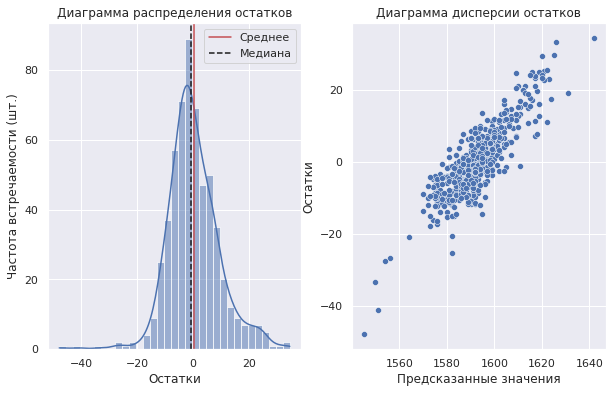

In [93]:
# находим остатки
residuals = y_test - predictions_best_model

# визуализируем распределение остатков
fig, ax = plt.subplots(1, 2, figsize=(10, 6))
sns.histplot(residuals, ax=ax[0], kde=True)
ax[0].set_xlabel('Остатки')
ax[0].set_ylabel('Частота встречаемости (шт.)')
ax[0].set_title('Диаграмма распределения остатков')
ax[0].axvline(x=np.mean(residuals), c='r', label='Среднее')
ax[0].axvline(x=np.median(residuals), c='k', ls='--', label='Медиана')
ax[0].legend()
print('Среднее значение остатков:', np.mean(residuals))
print('Медианное значение остатков:', np.median(residuals))

sns.scatterplot(x=y_test, y=residuals)
ax[1].set_xlabel('Предсказанные значения')
ax[1].set_ylabel('Остатки')
ax[1].set_title('Диаграмма дисперсии остатков');

Можно видеть, что остатки имеют случайное распределение с центром около нуля. Дисперсию остатков можно считать постоянной на всём диапазоне предсказаний. Таким образом, можно говорить о хорошем качестве обучения модели.

Выполним анализ важности признаков с помощью SHAP:

In [94]:
# копируем датафрейм для дальнейшей работы с колонками
X_test_shap = X_test.copy()

# переименовываем колонки для построения диаграммы
X_test_shap.columns = [
    'Начальная температура сплава',
    'Энергия',
    'Объём инертного газа',
    'Масса 3',
    'Масса 4',
    'Масса 14',
    'Масса 15',
    'Провод 1',
    'Провод 2'
]

# инициализируем объект SHAP
explainer = shap.SamplingExplainer(svr_best_model.predict, X_test_shap)

# получаем SHAP-значения
shap_values = explainer(X_test_shap)

  0%|          | 0/572 [00:00<?, ?it/s]

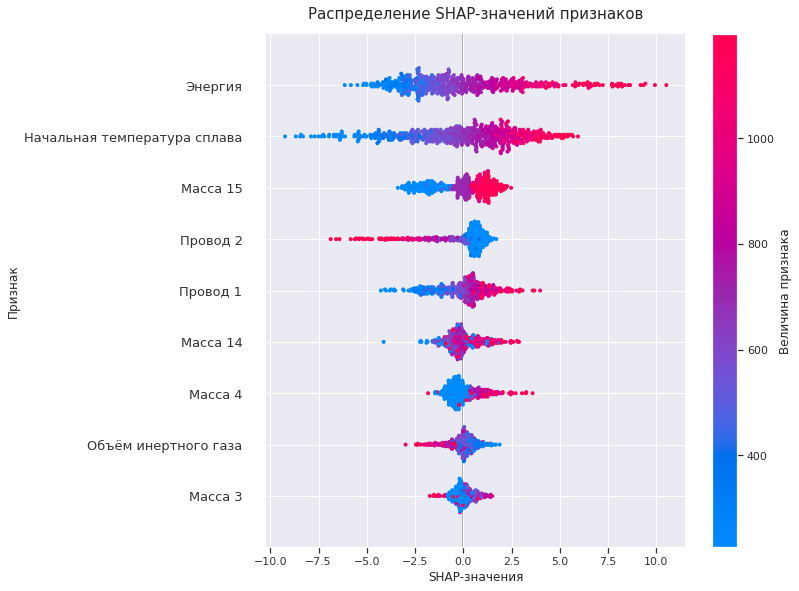

In [95]:
# строим диаграмму beeswarm
shap.summary_plot(shap_values, color=plt.get_cmap('cool'),
                  color_bar=False, show=False, plot_size=(11, 8))

fig, ax = plt.gcf(), plt.gca()
ax.set_xlabel('SHAP-значения', fontsize=12)
ax.set_ylabel('Признак', fontsize=12)
cb = plt.colorbar()
cb.set_label(label='Величина признака', fontsize=12)
plt.title('Распределение SHAP-значений признаков', fontsize=15, pad=15);

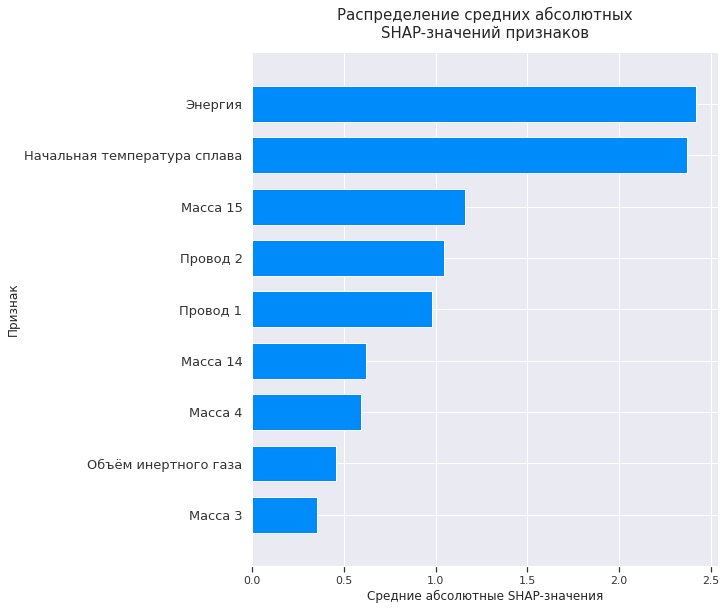

In [96]:
# строим barplot SHAP
shap.summary_plot(shap_values, plot_type='bar', show=False, plot_size=(10, 8))

fig, ax = plt.gcf(), plt.gca()
ax.set_xlabel('Средние абсолютные SHAP-значения', fontsize=12)
ax.set_ylabel('Признак', fontsize=12)
plt.title('''Распределение средних абсолютных
SHAP-значений признаков''', fontsize=15, pad=15);

### Вывод по результатам выбора лучшей модели

Лучшей признана модель метода опорных векторов для данных, масштабированных с помощью `StandardScaler`, с гиперпараметрами `C`=4.04, `epsilon`=0.35, показавшая при кросс-валидации значение метрики MAE в размере 6.75.

На тестовой выборке лучшая модель продемонстрировала значение метрики MAE в размере 6.79, что не превышает требуемого порога 6.8.

Незначительное отличие значений метрики MAE лучшей модели при кросс-валидации и на тестовой выборке говорит о хорошей обобщающей и предсказательной способностях модели, а также об отсутствии переобучения модели.

Распределение остатков модели унимодальное, похоже на нормальное, с центром около нуля. Это означает что остатки случайны, то есть никаких закономерностей в остатках не осталось после обучения модели. Дисперсия остатков гомоскедатична (постоянна на всём диапазоне предсказаний). Количество выбросов в предсказаниях модели незначительно и имеет случайный, а не систематический характер.

Анализ распределения SHAP-значений показывает разнонаправленное воздействие значений входных признаков на значения целевого признака. Так, к примеру, бОльшие значения энергии, начальной температуры сплава и признака "Масса 15" обуславливают бОльшие значения конечной температуры сплава, а признаки "Провод 2" и "Объём инертного газа" демонстрируют обратное воздействие на значение целевого признака.

При этом мы видим, что все признаки имеют довольно симметричные распределения по своим SHAP-значениям относительно нуля, что подтверждает значимую дифференцирующую силу признаков, использованных при обучении модели, и хорошее качество самой модели, поскольку модели удалось верно определить вклад каждого входного признака в предсказания целевого признака.

Анализ распределения средних абсолютных SHAP-значений показывает, что все отобранные входные признаки являются значимыми для выполнения предсказаний, поскольку ни у одного из них не наблюдается слишком низких средних абсолютных SHAP-значений (ниже 0.2). При этом наиболее важными для предсказания значений целевого признака являются следующие признаки со средними абсолютными SHAP-значениями, приближающимися к 2.5:

- Энергия;
- Начальная температура сплава.

Вторая по важности группа признаков со средними абсолютными SHAP-значениями порядка 1.0 - 1.2:

- Масса 15;
- Провод 2;
- Провод 1.

Остальные признаки вносят существенно меньший вклад в выполнение предсказаний значений целевого признака (их средние абсолютные SHAP-значения значительно меньше 1.0):

- Масса 14;
- Масса 4;
- Объём инертного газа;
- Масса 3.

## Общий вывод (отчёт)

Целью исследования являлась разработка модели машинного обучения для предсказания температуры сплава по входным данным о сплаве с метрикой MAE, значение которой на тестовой выборке должно быть не более 6.8 градусов. Таким образом, в исследовании выполнялось обучение с учителем для задачи регрессии.

В процессе исследования были изучены данные из нескольких датасетов и собран единый датафрейм для обучения модели, обучены 6 моделей машинного обучения, выбрана лучшая модель и проанализировано её качество на тестовой выборке.

Специфика данных диктовала необходимость выполнять проверки и делать агрегирование данных по номеру ковша и по временным промежуткам измерения температуры.

В исследовании каждый ковш рассматривался как неделимая единица технологического процесса, поэтому все данные проверялись агрегированно по каждому ковшу.

Большое внимание уделялось тому, чтобы в финальный датафрейм для обучения моделей не вошли лишние данные о нагревании и легировании сплава. Для этого выполнялась проверка соответствия общих промежутков времени нагревания и легирования общим промежуткам времени измерения температуры сплава, и только в случае такого соответствия информация о ковше попадала в финальную выборку для обучения моделей.

В финальный датафрейм вошли следующие признаки, каждый из которых был проверен на наличие пропущенных и аномальных значений и предобработан, если это было необходимо:

- `end_temp` - конечная температура сплава (целевой признак), при этом из датафрейма `df_temp_new` были удалены ковши, для которых хотя бы одно значение температуры (начальное, промежуточное или конечное) было пропущено либо было меньше 1400 градусов;
- `start_temp` - начальная температура сплава, при этом из датафрейма `df_temp_new` были удалены ковши, для которых хотя бы одно значение температуры (начальное, промежуточное или конечное) было пропущено либо было меньше 1400 градусов;
- `heating_energy` - энергия, затрачиваемая на нагревание ковша в течение всего цикла обработки, рассчитана на основе данных датафрейма `df_arc_new`, при этом из датафрейма были удалены аномальные значения реактивной мощности меньше нуля;
- `gas_1` - объём инертного газа для продувки сплава;
- `bulk_3_vol` - признак "Масса 3", только для тех ковшей, для которых легирование было начато после первого измерения температуры и закончено до последнего измерения температуры;
- `bulk_4_vol` - признак "Масса 4", только для тех ковшей, для которых легирование было начато после первого измерения температуры и закончено до последнего измерения температуры;
- `bulk_14_vol` - признак "Масса 14", только для тех ковшей, для которых легирование было начато после первого измерения температуры и закончено до последнего измерения температуры;
- `bulk_15_vol` - признак "Масса 15", только для тех ковшей, для которых легирование было начато после первого измерения температуры и закончено до последнего измерения температуры;
- `wire_1_vol` - признак "Провод 1", только для тех ковшей, для которых легирование было начато после первого измерения температуры и закончено до последнего измерения температуры;
- `wire_2_vol` - признак "Провод 2", только для тех ковшей, для которых легирование было начато после первого измерения температуры и закончено до последнего измерения температуры.

Признак `bulk_12_vol` не вошёл в финальный датафрейм ввиду мультиколлинеарности с признаками `bulk_14_vol` и `bulk_15_vol`.

После того как финальный датафрейм был собран, из него были удалены записи, в которых начальная и конечная температура сплава совпадали, чтобы исключить утечку целевого признака.

В процессе исследования было выполнено обучение с учителем для задачи регрессии следующих моделей:

 - `Ridge`;
 - `Lasso`;
 - `SVR`;
 - `kNN`;
 - `DecisionTree`;
 - `LightGBM`.
 
Для каждой модели были подобраны гиперпараметры и проверено её качество при кросс-валидации.
 
В результате лучшей моделью была признана модель метода опорных векторов для данных, масштабированных с помощью `StandardScaler`, с гиперпараметрами `C`=4.04, `epsilon`=0.35, показавшая на тестовой выборке значение метрики MAE в размере 6.79, что не превышает требуемый порог 6.8.

Модель обладает хорошей обобщающей и предсказательной способностью, а также не переобучилась.

Распределение остатков модели случайно, дисперсия остатков гомоскедатична.

При этом входные признаки по-разному влияют на предсказание целевого признака. Например, бОльшие значения энергии, начальной температуры сплава и признака "Масса 15" обуславливают бОльшие значения конечной температуры сплава, а признаки "Провод 2" и "Объём инертного газа" демонстрируют обратное воздействие на значение целевого признака.

Все признаки, использованные в обучении модели, имеют значимую дифференцирующую силу для выполнения предсказаний, что подтверждается симметричным распределением их SHAP-значений относительно нуля, а также не слишком маленькими средними абсолютными SHAP-значениями.

Значимость признаков убывает в следующем порядке:

- Энергия;
- Начальная температура сплава;
- Масса 15;
- Провод 2;
- Провод 1;
- Масса 14;
- Масса 4;
- Объём инертного газа;
- Масса 3.

По результатам выполненного исследования можно рекомендовать к использованию модель метода опорных векторов для данных, масштабированных с помощью `StandardScaler`, с гиперпараметрами `C`=4.04, `epsilon`=0.35.

При этом необходимо учитывать, что в финальную выборку для обучения модели вошли далеко не все имевшиеся данные в связи с наличием пропущенных значений в них. Поэтому для улучшения предлагаемого бизнес-решения следует более качественно собирать данные из разных источников. Например, можно объединить все эти данные в единую базу и формализовать заполнение соответствующих колонок таблиц с выполнением проверок на корректность вводимых в них данных, чтобы минимизировать в будущем затраты времени на их предобработку. Также можно ввести новые признаки (например, полиномиальные) для лучшего разделения данных при обучении модели.

<img src="http://s3.amazonaws.com/pix.iemoji.com/images/emoji/apple/ios-12/256/waving-hand.png" align=left width=44, heigth=44>
<div class="alert alert-success" style="border-color: green; border-radius: 5px">
<b> КОММЕНТАРИЙ МЕНТОРА 2</b><br> Ухххх,попробую отвтеить. <br>
1) по поводу разности температур: писал выше, что и такой подход  - тоже возможен. Нам не запрещено его опробовать. А то, что первую не надо смотреть (может не так понял тебя) - тут не соглашусь. Ведь первая температура - это начальное состояние объекта моделирования. А у нас как раз задача связать начальное состояние с конечным, присоединив факторы производства. Но повторюсь - в каждой задаче надо исходить из конкретной ситуации. Шаблонных решений нет. Есть подходы и алгоритмы. А как мы их применим - это уже другой вопроc)<br>
    
2) Вот абсолютно согласен с прогнозипрованием. Применение МЛ в лоб не поможет точно прогнозировать. От слова совсем. По большому счёту МЛ помогает в двух вещах: влияет на скорость и аргументированность принятия решения. Но итоговая точность зависит от того, как нам удалось понять сам бизнес-процесс, определить и оцифровать факторы на него влияющие. При этом, если говорить о прогнозах продаж, например, то точного прогноза не бывает. Мы можем контролировать некий уровень ошибки - это в наших силах. А точного прогноза добиться не возможно) Определили уровень ошибки текущей модели и используем её в работе. В будущем вправе ожидать от неё такой же ошибки. Т.е. и ошибки в бизнесе. Но модель также помогает анализировать (анализ важности факторов) факторы, влияющие на процесс. Или по другому - определять долю ошибки каждого фактора в общей ошибке прогноза. Именно это поможет работать над качество процессов - постояннный момниторинг ошибки и выявление причин, если ошибка вышла за границы. <br>
    
Но если стои задача классификации, то МЛ - сильно помогает. Без него уже сложнее будет) Например рекомендательные системы в интернет-магазинах. Там исключительно на вероятностных моделях всё работает. Также Компьютерное зрение и распознование текстов - тут без МЛ тоже уже никуда. За последнее время произошёл сильный скачок в этом направлении.<br>
    
По итогу так скажу: МЛ - это лишь инструмент, прилагающийся к здравому смыслу аналитика и менеджера. Аналитика может рекомендовать, а окончательное решение - за опытом руководителя.<br>
В общем, моё мнение совпадает с твоим, по большому счёту)<br>

Рекомендовал бы посмотреть вот какие темы (если ещё изучал):<br>
1) Организация проектов по проведению моделирования (например Методология CRISP-DM (Cross-Industry Standard Process)<br>
2) Умения системно подходить к решению аналитической задачи. (например методология ТРИЗ, системный анализ)<br>
3) Если в промышленности будут проекты, то рекоммендовал бы освоить  "Статистичекий контроль качества (SPC)" Но это не только в промышленности. На мой взгляд это шикарный инструмент для любого менеджера в любой отрасли, где надо контролировать и мониторить бизнес-процессы (я про контрольные карты Шухарта).<br>
    
Спасибо, Александр, за этот труд! Возможно, что не те вопросы отвтеил.. Но старался быть искренним)<br>
Искренне желаю покорить ещё не один аналитический Эверест)<br> 